# Credit Card Fraud Detection

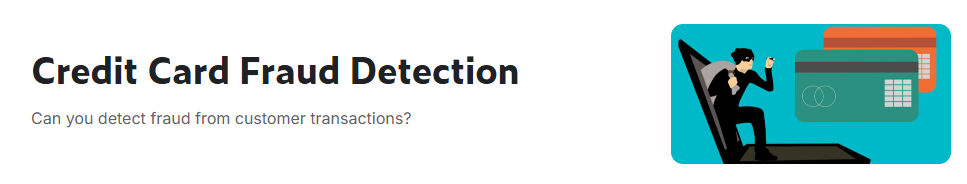
+ https://www.kaggle.com/competitions/credit-card-fraud-prediction/submissions

In [1]:
# =========================================
# ‚úÖ Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# =========================================
# ‚úÖ ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
# =========================================
sns.set()
plt.rcParams['font.family'] = 'Malgun Gothic'   # ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False      # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# =========================================
# ‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìúÏö© (Scikit-learn ÎÇ¥Ïû•)
# =========================================
from sklearn.datasets import load_iris, load_breast_cancer

# =========================================
# ‚úÖ Ï†ÑÏ≤òÎ¶¨ / Ïä§ÏºÄÏùºÎßÅ / Ïù∏ÏΩîÎî©
# =========================================
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    OneHotEncoder, LabelEncoder
)

# =========================================
# ‚úÖ Ï∞®Ïõê Ï∂ïÏÜå
# =========================================
from sklearn.decomposition import PCA

# =========================================
# ‚úÖ Î∂ÑÎ•ò Î™®Îç∏
# =========================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
)
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# =========================================
# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ / Í≤ÄÏ¶ù
# =========================================
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold,
    cross_val_score, GridSearchCV
)

# =========================================
# ‚úÖ ÌèâÍ∞Ä ÏßÄÌëú
# =========================================
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, fbeta_score, classification_report
)
import shap

In [2]:
# !pip install shap

# def models

In [3]:
random_state = 8033

def models(X, y, test_size=0.2, random_state=random_state):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=random_state, stratify=y )

    model = LogisticRegression(max_iter=1000, random_state=random_state)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # ÏÇ¨Í∏∞Ïùº ÌôïÎ•†
    auc = roc_auc_score(y_test, y_proba)

    print(f"AUC Score: {auc:.5f}")
    return model, auc, X_train, X_test, y_train, y_test

# Data Load

In [4]:
ctrain = pd.read_csv('../pred/train.csv')
ctest = pd.read_csv('../pred/test.csv')
print(ctrain.shape, ctest.shape)

(150000, 32) (69129, 31)


In [5]:
ctrain.head()

id  Time     feat1     feat2     feat3     feat4     feat5     feat6  \
0   0   0.0  2.074329 -0.129425 -1.137418  0.412846 -0.192638 -1.210144   
1   1   0.0  1.998827 -1.250891 -0.520969 -0.894539 -1.122528 -0.270866   
2   2   0.0  0.091535  1.004517 -0.223445 -0.435249  0.667548 -0.988351   
3   3   0.0  1.979649 -0.184949 -1.064206  0.120125 -0.215238 -0.648829   
4   4   0.0  1.025898 -0.171827  1.203717  1.243900 -0.636572  1.099074   

      feat7     feat8     feat9    feat10    feat11    feat12    feat13  \
0  0.110697 -0.263477  0.742144  0.108782 -1.070243 -0.234910 -1.099360   
1 -1.029289  0.050198 -0.109948  0.908773  0.836798 -0.056580 -0.120990   
2  0.948146 -0.084789 -0.042027 -0.818383 -0.376512 -0.226546 -0.552869   
3 -0.087826 -0.035367  0.885838 -0.007527  0.637441  0.676960 -1.504823   
4 -0.938651  0.569239  0.692665 -0.097495  1.338869  1.391399 -0.128167   

     feat14    feat15    feat16    feat17    feat18    feat19    feat20  \
0  0.502467  0.169318  0.065688 -0.306957 -0.323800  0.103348 -0.292969   
1 -0.144028 -0.039582  1.653057 -0.253599 -0.814354  0.716784  0.065717   
2 -0.886466 -0.180890  0.230286  0.590579 -0.321590 -0.433959 -0.021375   
3  0.554039 -0.824356 -0.527267 -0.095838 -0.312519  0.642659 -0.340089   
4 -0.081836  0.100548 -0.338937  0.090864 -0.423645 -0.731939 -0.203628   

     feat21    feat22    feat23    feat24    feat25    feat26    feat27  \
0 -0.334701 -0.887840  0.336701 -0.110835 -0.291459  0.207733 -0.076576   
1  0.054848 -0.038367  0.133518 -0.461928 -0.465491 -0.464655 -0.009413   
2 -0.326725 -0.803736  0.154495  0.951233 -0.506919  0.085046  0.224458   
3 -0.095514 -0.079792  0.167701 -0.042939  0.000799 -0.096148 -0.057780   
4  0.099157  0.608908  0.027901 -0.262813  0.257834 -0.252829  0.108338   

     feat28  Transaction_Amount  IsFraud  
0 -0.059577                1.98        0  
1 -0.038238               84.00        0  
2  0.087356                2.69        0  
3 -0.073839                1.00        0  
4  0.021051                1.00        0

In [6]:
ctest.head()

id   Time     feat1     feat2     feat3     feat4     feat5     feat6  \
0  150000  73899 -0.681234 -0.371212  0.385966  0.955703  2.064078  0.338827   
1  150001  73899 -1.098947 -0.959377  0.324934  0.703908  1.090582 -1.595909   
2  150002  73899  0.977029 -0.270984  0.471526 -1.232570  0.957537 -0.636602   
3  150003  73900  1.176658 -0.225816 -0.246600  0.015513  1.103831  1.229516   
4  150004  73900  0.804828 -0.272967  0.959910 -1.117567  0.395748  0.589855   

      feat7     feat8     feat9    feat10    feat11    feat12    feat13  \
0 -0.539452 -0.254046  0.010960  0.753938 -0.547338  0.559844  0.261633   
1  0.584548  0.260069  0.057549  0.426822  0.151724  0.347829  0.121715   
2 -0.953060 -1.491744  0.226865 -1.170845  0.079796  0.232440 -0.655584   
3 -1.527098 -0.459769  0.749163 -0.527557  0.135978  0.952855  0.329651   
4  1.059880 -1.101203  0.066464 -0.407908  0.097648 -1.187040  0.161779   

     feat14    feat15    feat16    feat17    feat18    feat19    feat20  \
0  0.847703 -0.992736  0.552428 -0.381524 -0.063139  0.919230  0.183560   
1 -0.175946 -0.090564  0.177865  0.614954  0.252661 -0.456465  0.334764   
2  0.926557 -0.715356  1.482958  1.818205 -0.466738  0.166645  0.355728   
3  0.043979 -0.522082  0.051839 -0.079553 -0.291359 -0.049557 -0.152613   
4 -0.472614  0.525869  0.597516 -1.202675  1.681688 -1.335861 -0.127818   

     feat21    feat22    feat23    feat24    feat25    feat26    feat27  \
0 -0.253324  0.266668 -0.153829  0.455969 -0.503628  0.257588 -0.456685   
1  0.130108  0.676928 -0.161070 -0.638011 -0.273424  0.711132  0.349967   
2  0.517912  1.175087 -0.325895 -0.362636  0.306037  0.004828  0.037389   
3 -0.104600  0.003800 -0.023180 -0.458338  0.481427 -0.381415  0.080165   
4 -0.011849  0.078540 -0.241700  0.010130  0.302614 -0.259568  0.023127   

     feat28  Transaction_Amount  
0 -0.298919               30.42  
1  0.141233               23.00  
2  0.058222              198.00  
3  0.027372                9.99  
4  0.056957              239.00

# 1Ï∞® Ï†êÏàò

In [7]:
target_col = "IsFraud"
X = ctrain.drop(columns=[target_col, "id"])  # idÎäî ÏãùÎ≥ÑÏûêÏù¥ÎØÄÎ°ú Ï†úÍ±∞
y = ctrain[target_col]

model, auc, X_train, X_test, y_train, y_test = models(X, y)

AUC Score: 0.77421


# EDA

## Time Î≤îÏúÑ

In [8]:
print ( ctrain['Time'].min(), ctrain['Time'].max() )

0.0 73899.0


* Time : Ï≤´ Î≤àÏß∏ Í±∞ÎûòÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÌïú ÏãúÍ∞ÑÏùÑ Ï¥à Îã®ÏúÑÎ°ú ÎÇòÌÉÄÎÉÑ
* ÏãúÍ∞Ñ Î≤îÏúÑÎäî 0 ~ 73899

## Í≤∞Ï∏°Ïπò

In [9]:
print ( ctrain.isnull().sum().sum(), ctest.isnull().sum().sum() ) 

0 0


* train / test Í≤∞Ï∏°Ïπò ÏóÜÏùå

## ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÏÑù

In [10]:
print(ctrain.info(), ctrain['IsFraud'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14              150000 non-nul

In [11]:
# IsFraud == 1 ÌôïÎ•†
269 / 149731

0.001796555155579005

* Ï†ÑÏ≤¥ 15Îßå Îç∞Ïù¥ÌÑ∞ Ï§ë ÏÇ¨Í∏∞Ïùº ÌôïÎ•†ÏùÄ 0.0017Îøê

In [12]:
ctrain[ctrain['IsFraud'] == 1]

id     Time     feat1     feat2     feat3     feat4     feat5  \
1681      1681    764.0  0.845797 -1.063059  0.120133 -0.312570 -0.056194   
2039      2039    923.0 -1.808089  1.794735 -2.574549 -1.944174 -4.093440   
2090      2090   1028.0 -0.368027  1.492913  0.653399  0.164478 -1.043918   
3072      3072   1328.0  1.990241 -0.185837 -1.039174  0.086245  0.107037   
3780      3780   1438.0 -0.738582  0.654464  0.652465 -0.139933  1.183689   
...        ...      ...       ...       ...       ...       ...       ...   
147761  147761  73456.0  1.216273  0.516905 -0.624755  1.094436  0.403531   
147901  147901  73499.0  1.202849  0.506734 -0.351667  0.788383  0.004716   
147942  147942  73514.0  1.054888 -1.564662  0.504515 -0.856142 -2.193655   
148715  148715  73626.0 -2.161337  1.333889  1.995527  0.854291 -0.332323   
149812  149812  73885.0  1.126948  0.081406  0.087555  0.917098 -0.440106   

           feat6     feat7     feat8     feat9    feat10    feat11    feat12  \
1681    1.944391 -0.661839  0.582721 -0.992366  0.564202  1.766655  0.826499   
2039   -1.360198 -8.837694 -3.865127  4.847707 -1.826233 -1.552959  1.796523   
2090    0.766250 -2.717382 -6.944203 -0.938474 -1.243744  1.555025  2.133379   
3072   -0.409425  0.016713 -0.126446  0.279865  0.184726  1.090518  1.617814   
3780   -0.037131  0.638169  0.136502 -0.357541 -0.238928  1.039441  0.302428   
...          ...       ...       ...       ...       ...       ...       ...   
147761 -0.391888  0.154194  0.005865 -0.084201 -0.396516  1.098939 -0.331036   
147901 -0.802345  0.009969 -0.039283 -0.204447 -0.566099  1.959295  0.567252   
147942 -1.040109 -1.006727 -0.077236 -1.794577  1.616858  1.283389 -1.188087   
148715  0.076561  0.159969 -0.095815  0.856748  1.307501  0.352780  0.096899   
149812 -0.527672 -0.273329  0.131776  0.459978 -0.499901  1.431379  0.351737   

          feat13    feat14    feat15    feat16    feat17    feat18    feat19  \
1681   -0.307964  0.393909  0.907691 -2.822682  1.055578 -1.061441 -2.138524   
2039   -1.531125 -0.242458  0.926706  0.113577 -0.155949  0.393524  1.085312   
2090    0.125978  1.131705  0.057716  0.944642 -0.440088  0.049590 -0.878509   
3072    0.906706  0.254738 -0.673049  0.193427 -0.771428 -0.214947  0.468155   
3780   -1.116929  0.651270 -0.295048 -0.421716 -0.456629 -0.037795 -0.826278   
...          ...       ...       ...       ...       ...       ...       ...   
147761 -1.561946 -0.627901  0.624187  0.605965  0.587745  0.966353 -0.277716   
147901 -0.136701 -1.155967  0.578896  0.812604  0.769886  0.784523 -0.321095   
147942 -1.824077  0.274925  0.107736 -0.264600  0.551330  1.049892 -0.316053   
148715  0.776865 -0.849055  1.849073  0.037887 -0.570044 -0.111490 -0.252919   
149812 -1.559838 -0.947541 -0.769440  0.086819  0.931513  0.299550  0.069895   

          feat20    feat21    feat22    feat23    feat24    feat25    feat26  \
1681   -0.569641 -0.430906 -0.919078  0.123612 -1.420935 -0.072559  0.293439   
2039    1.570826 -2.662635  1.173416 -0.136751  0.739760 -0.692745  0.818293   
2090    1.180116 -0.058687  1.185031  0.290564  0.528459  0.764303 -0.017768   
3072   -0.094906 -0.142725 -0.285513  0.263769  0.779628 -0.261358  0.255895   
3780   -0.314816  0.167918  0.563421  0.012614 -0.311213  0.105798 -0.252849   
...          ...       ...       ...       ...       ...       ...       ...   
147761 -0.202916 -0.070340 -0.075050 -0.165133 -0.454173  0.695309 -0.298828   
147901 -0.070198 -0.053989 -0.126428 -0.070012  0.073733  0.446997  0.363536   
147942 -0.092601  0.108775  0.180527 -0.195632  0.744263  0.303024  0.077879   
148715  0.521020 -0.202639  0.221634  0.171239  0.084834 -0.362708 -0.268099   
149812 -0.176955 -0.104034 -0.115056 -0.037649  0.454850  0.486712  0.380112   

          feat27    feat28  Transaction_Amount  IsFraud  
1681    0.061270  0.006448              136.58        1  
2039    0.745100  0.847648                2.00        1  
2090    0.110884  0.307835    

## Ï†ïÏÉÅ vs ÏÇ¨Í∏∞ Boxplot

Ï¥ù 30Í∞ú ÌîºÏ≤òÎ•º 6Í∞úÏî© Î¨∂Ïñ¥ 5Í∞úÏùò Ï∞®Ìä∏Î°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.


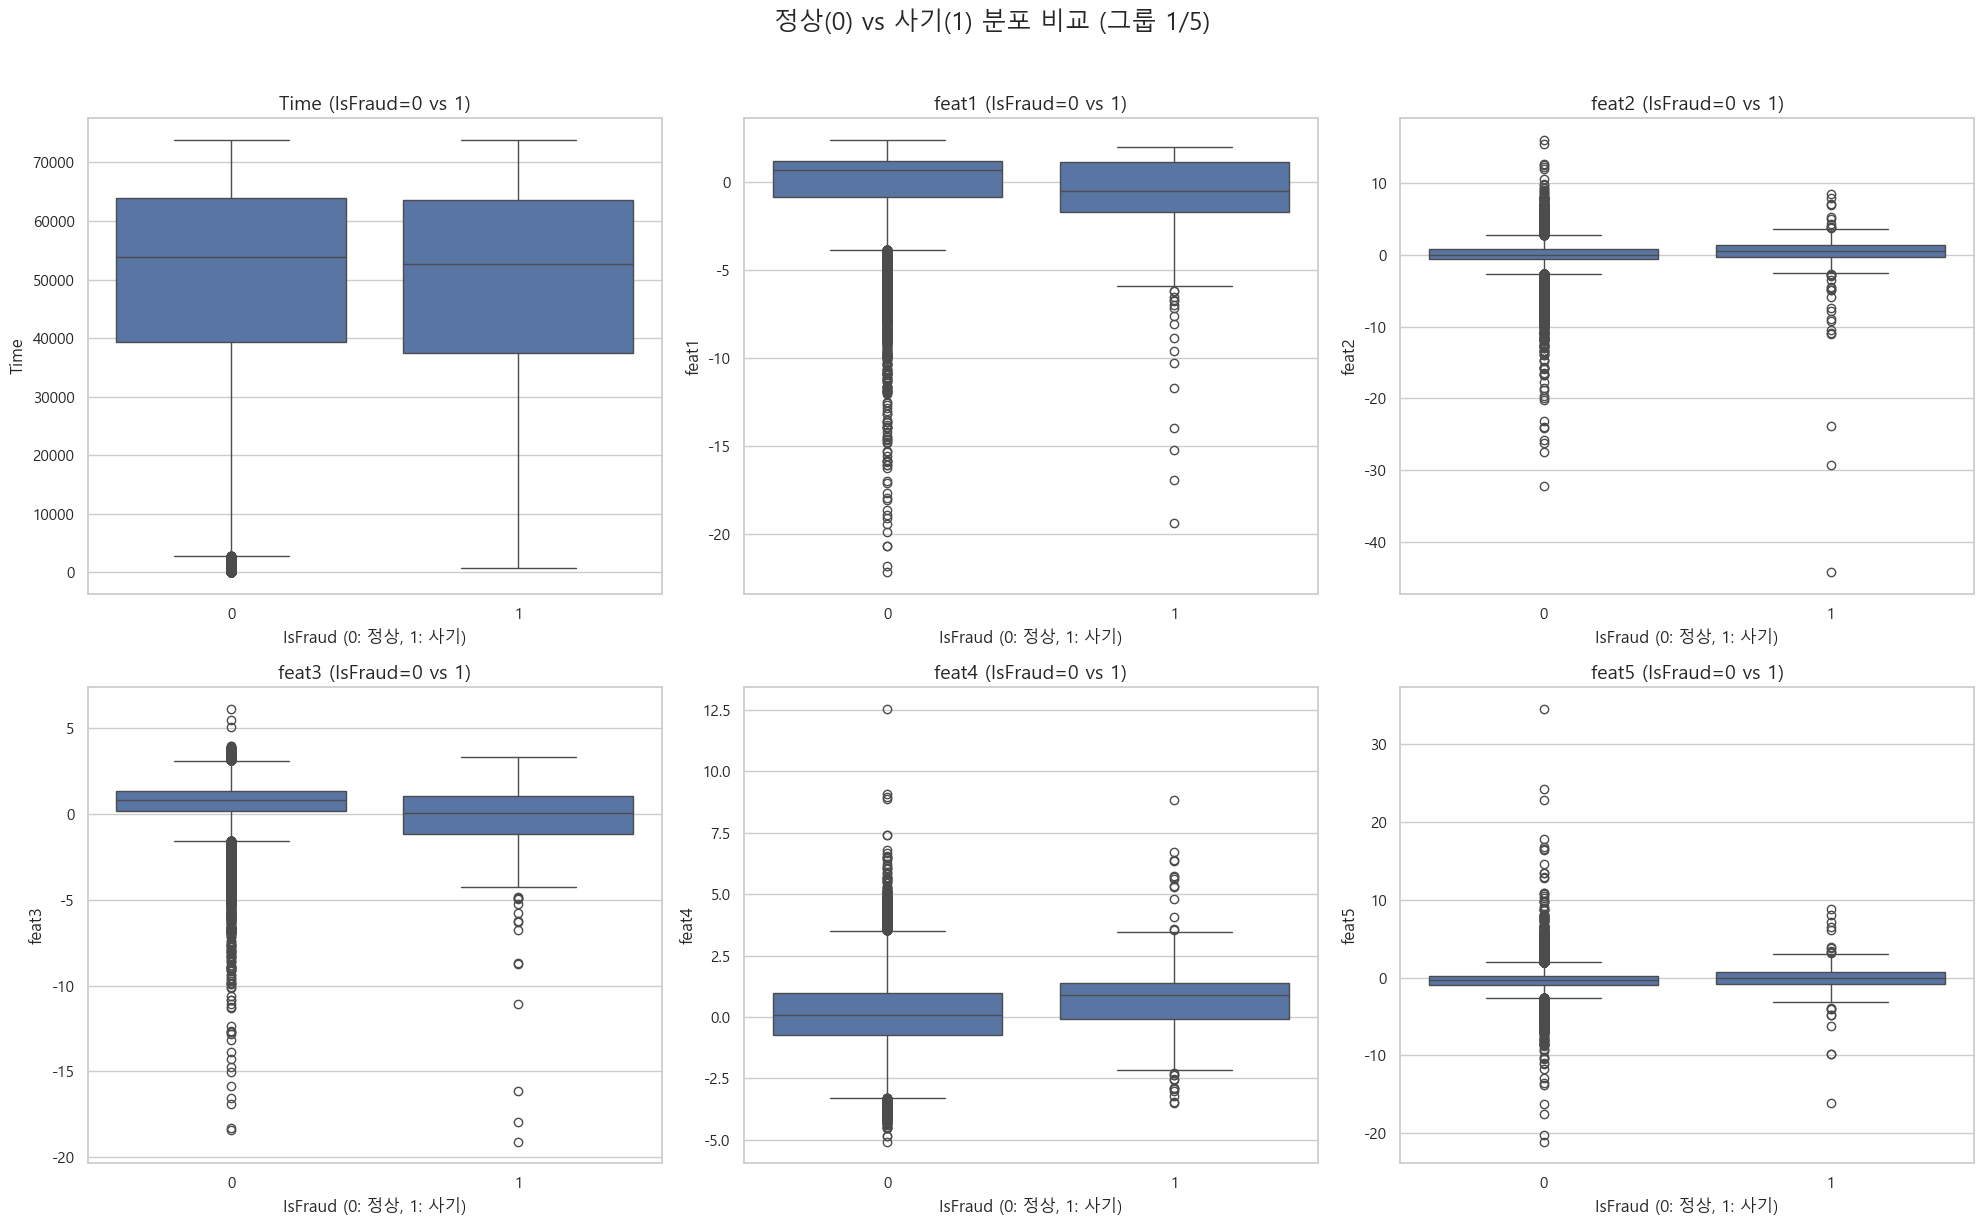

'boxplot_comparison_group_1.png' Ï†ÄÏû• ÏôÑÎ£å.



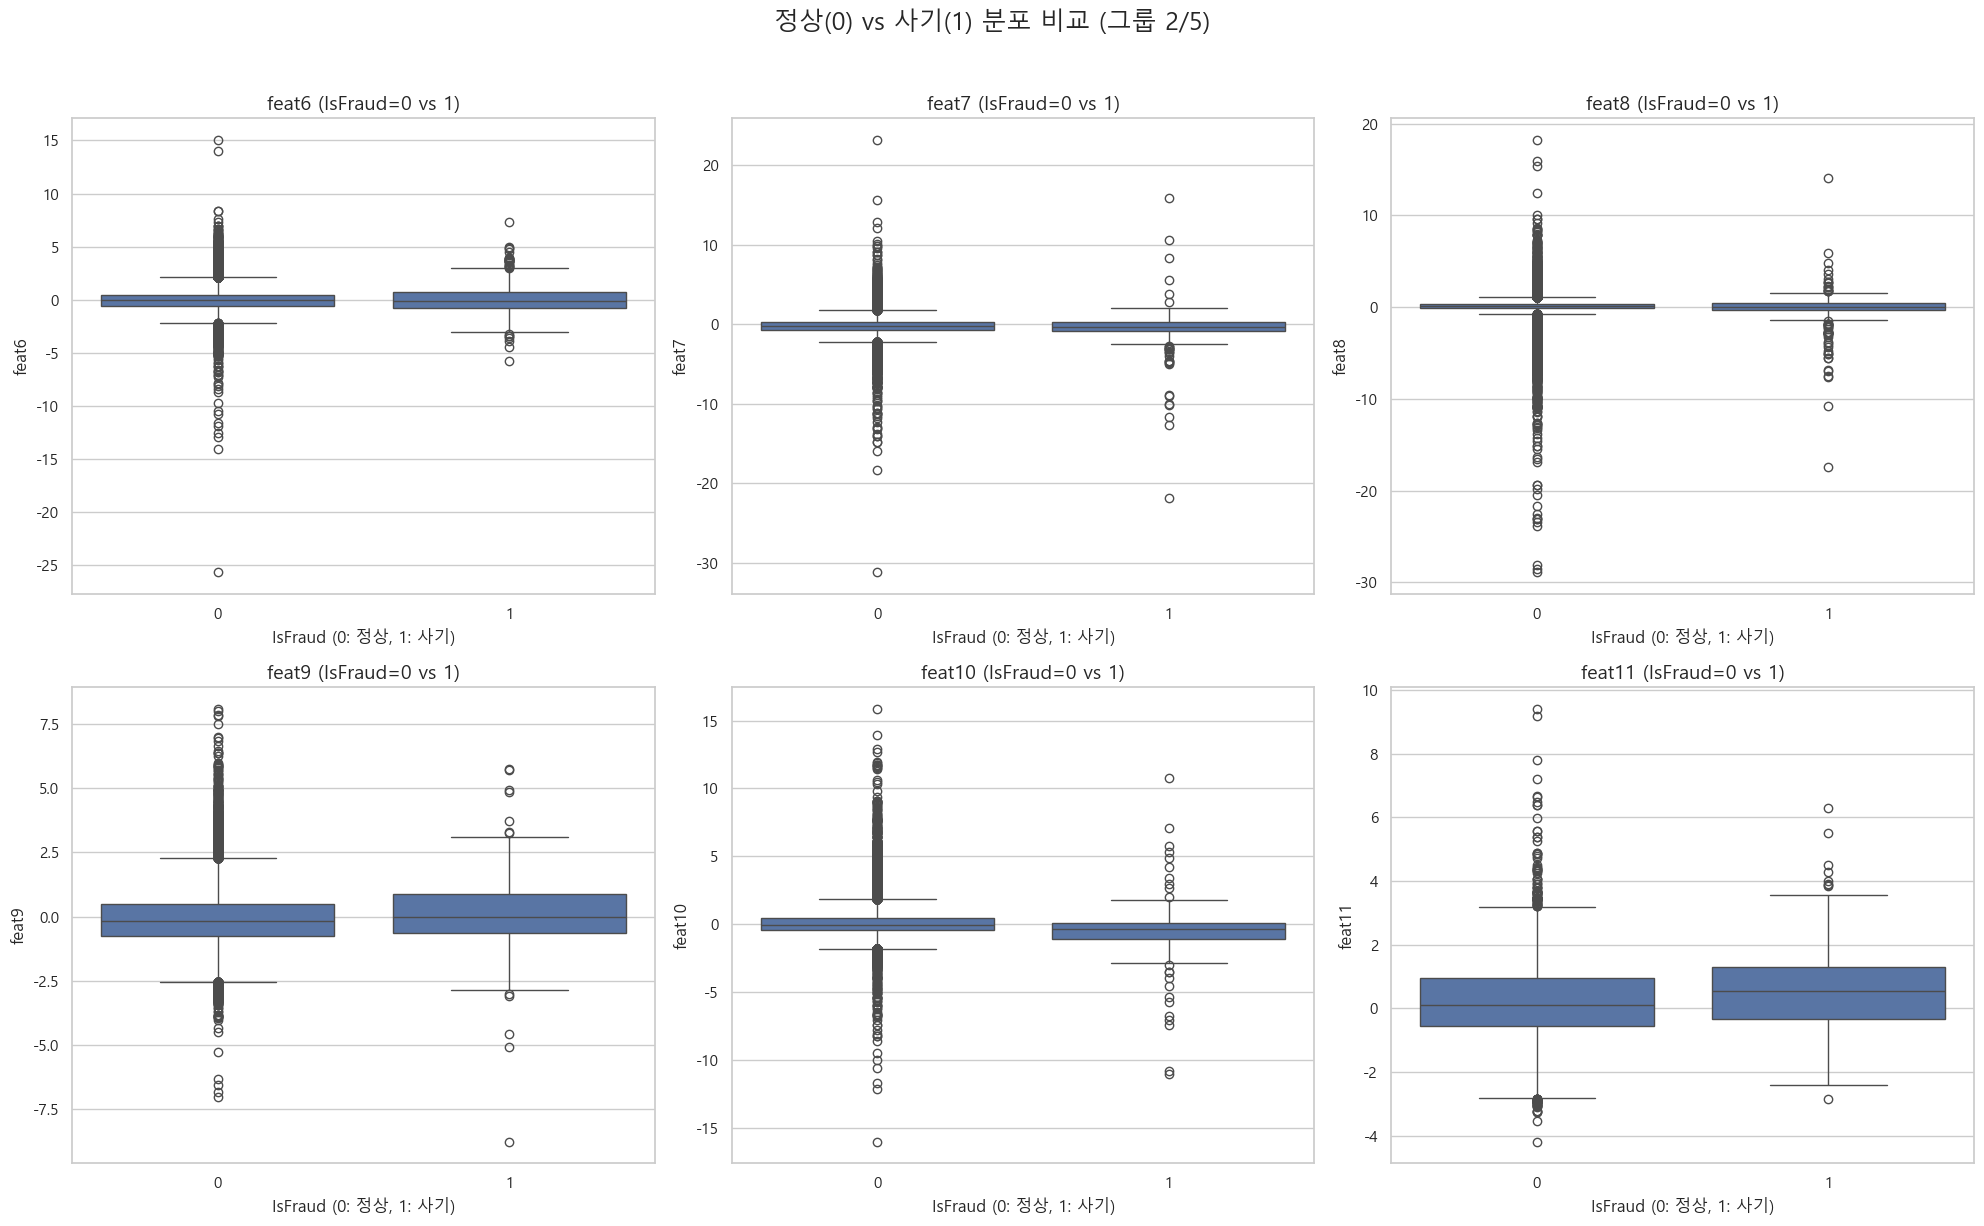

'boxplot_comparison_group_2.png' Ï†ÄÏû• ÏôÑÎ£å.



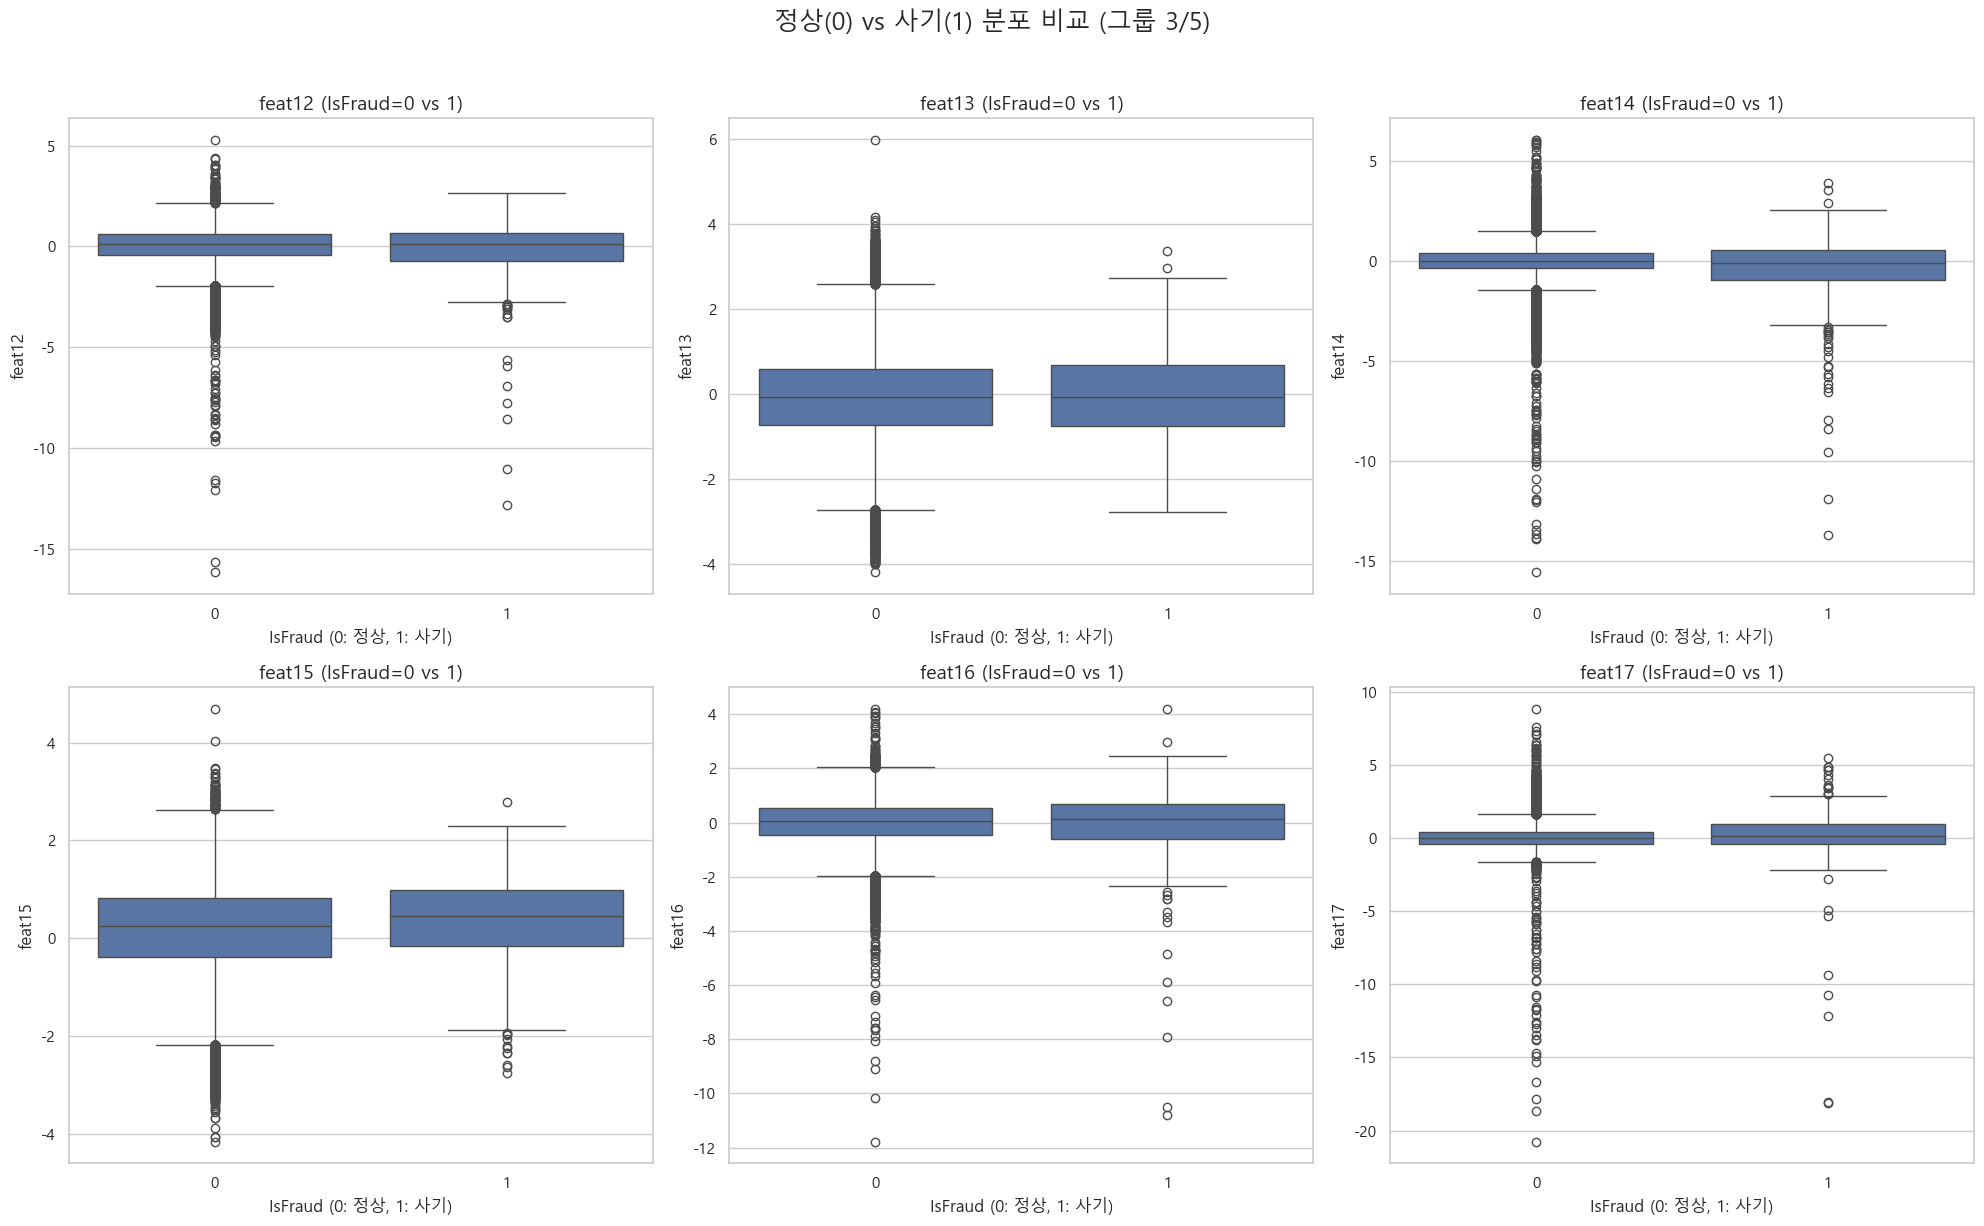

'boxplot_comparison_group_3.png' Ï†ÄÏû• ÏôÑÎ£å.



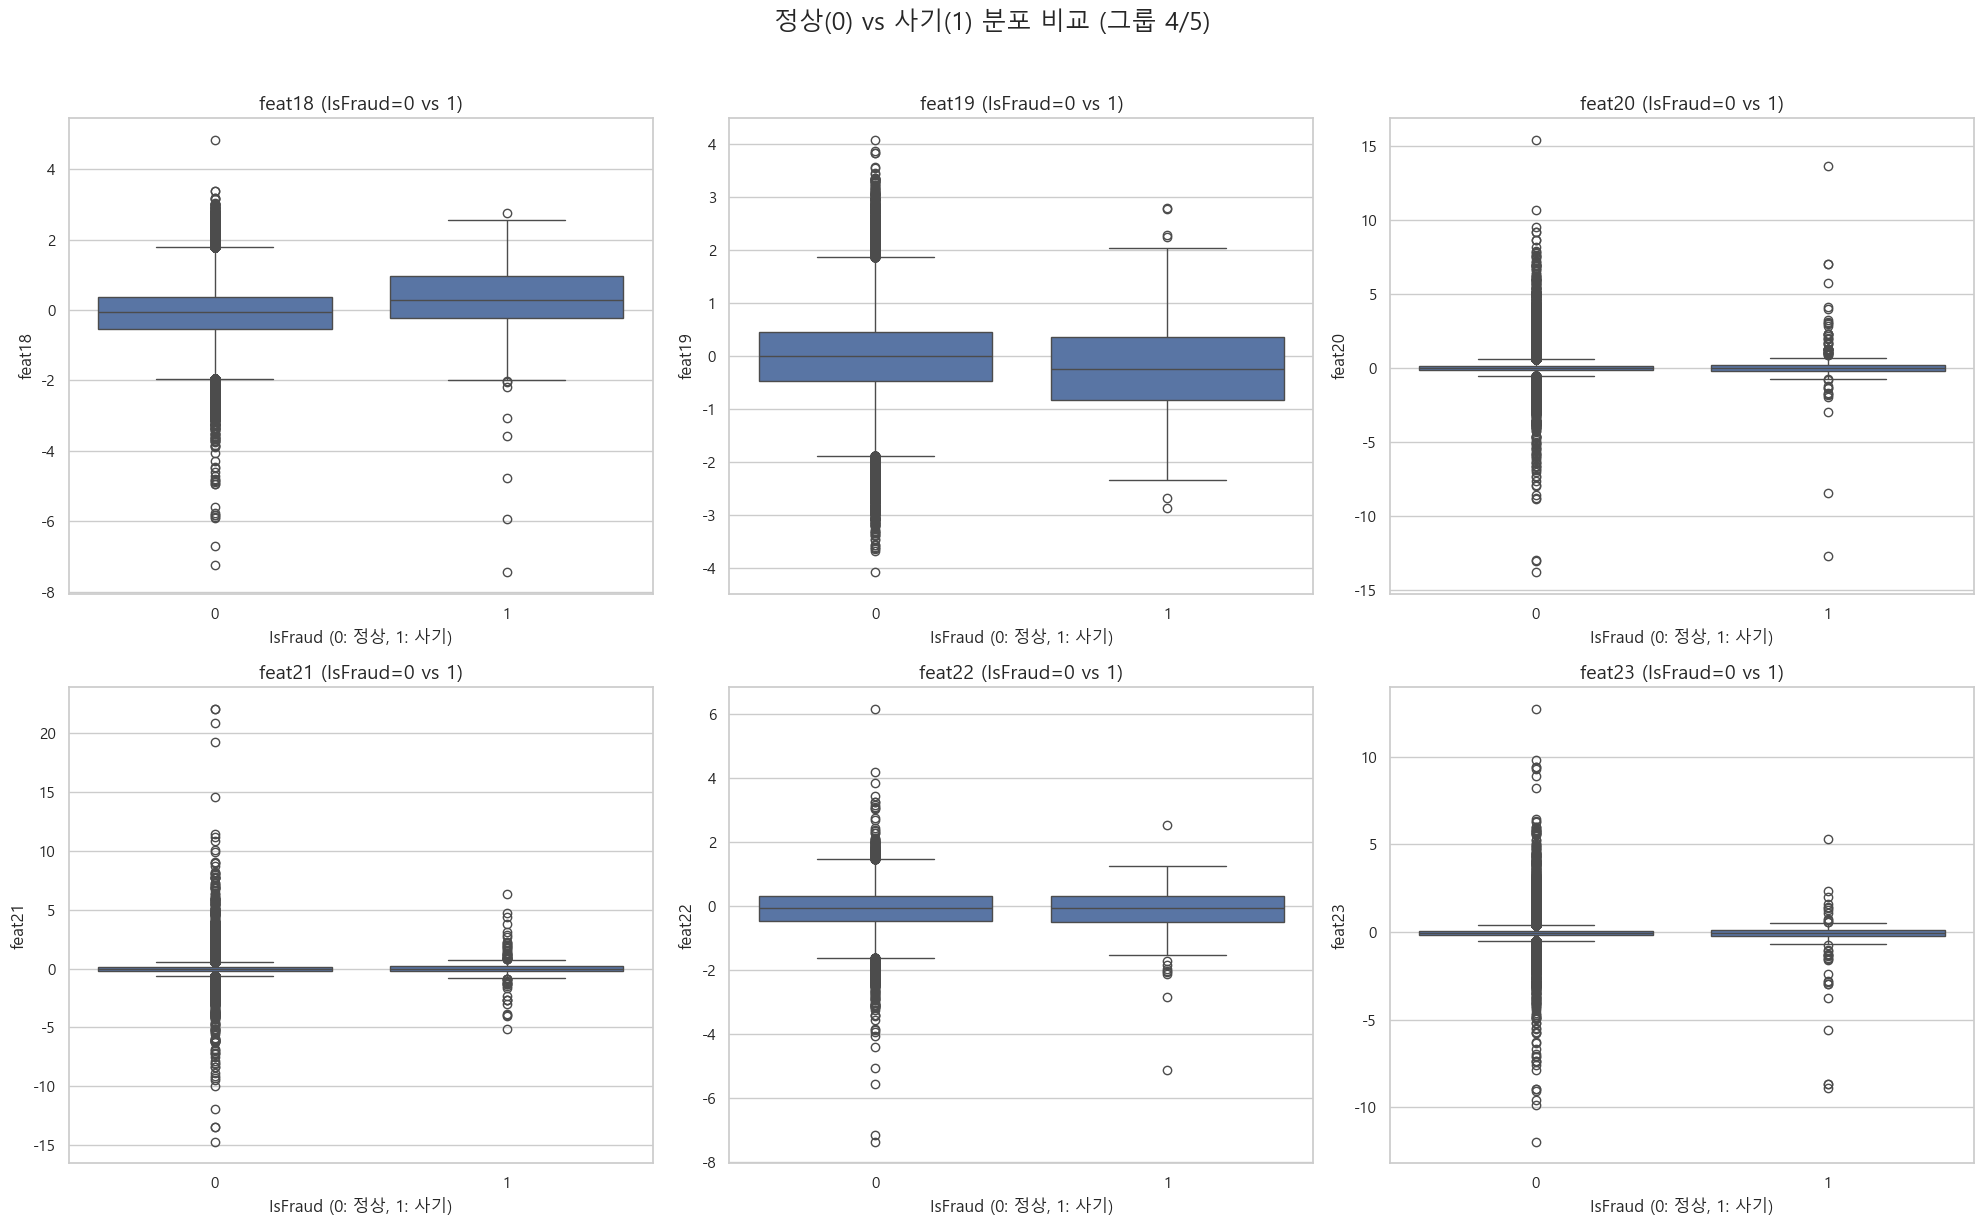

'boxplot_comparison_group_4.png' Ï†ÄÏû• ÏôÑÎ£å.



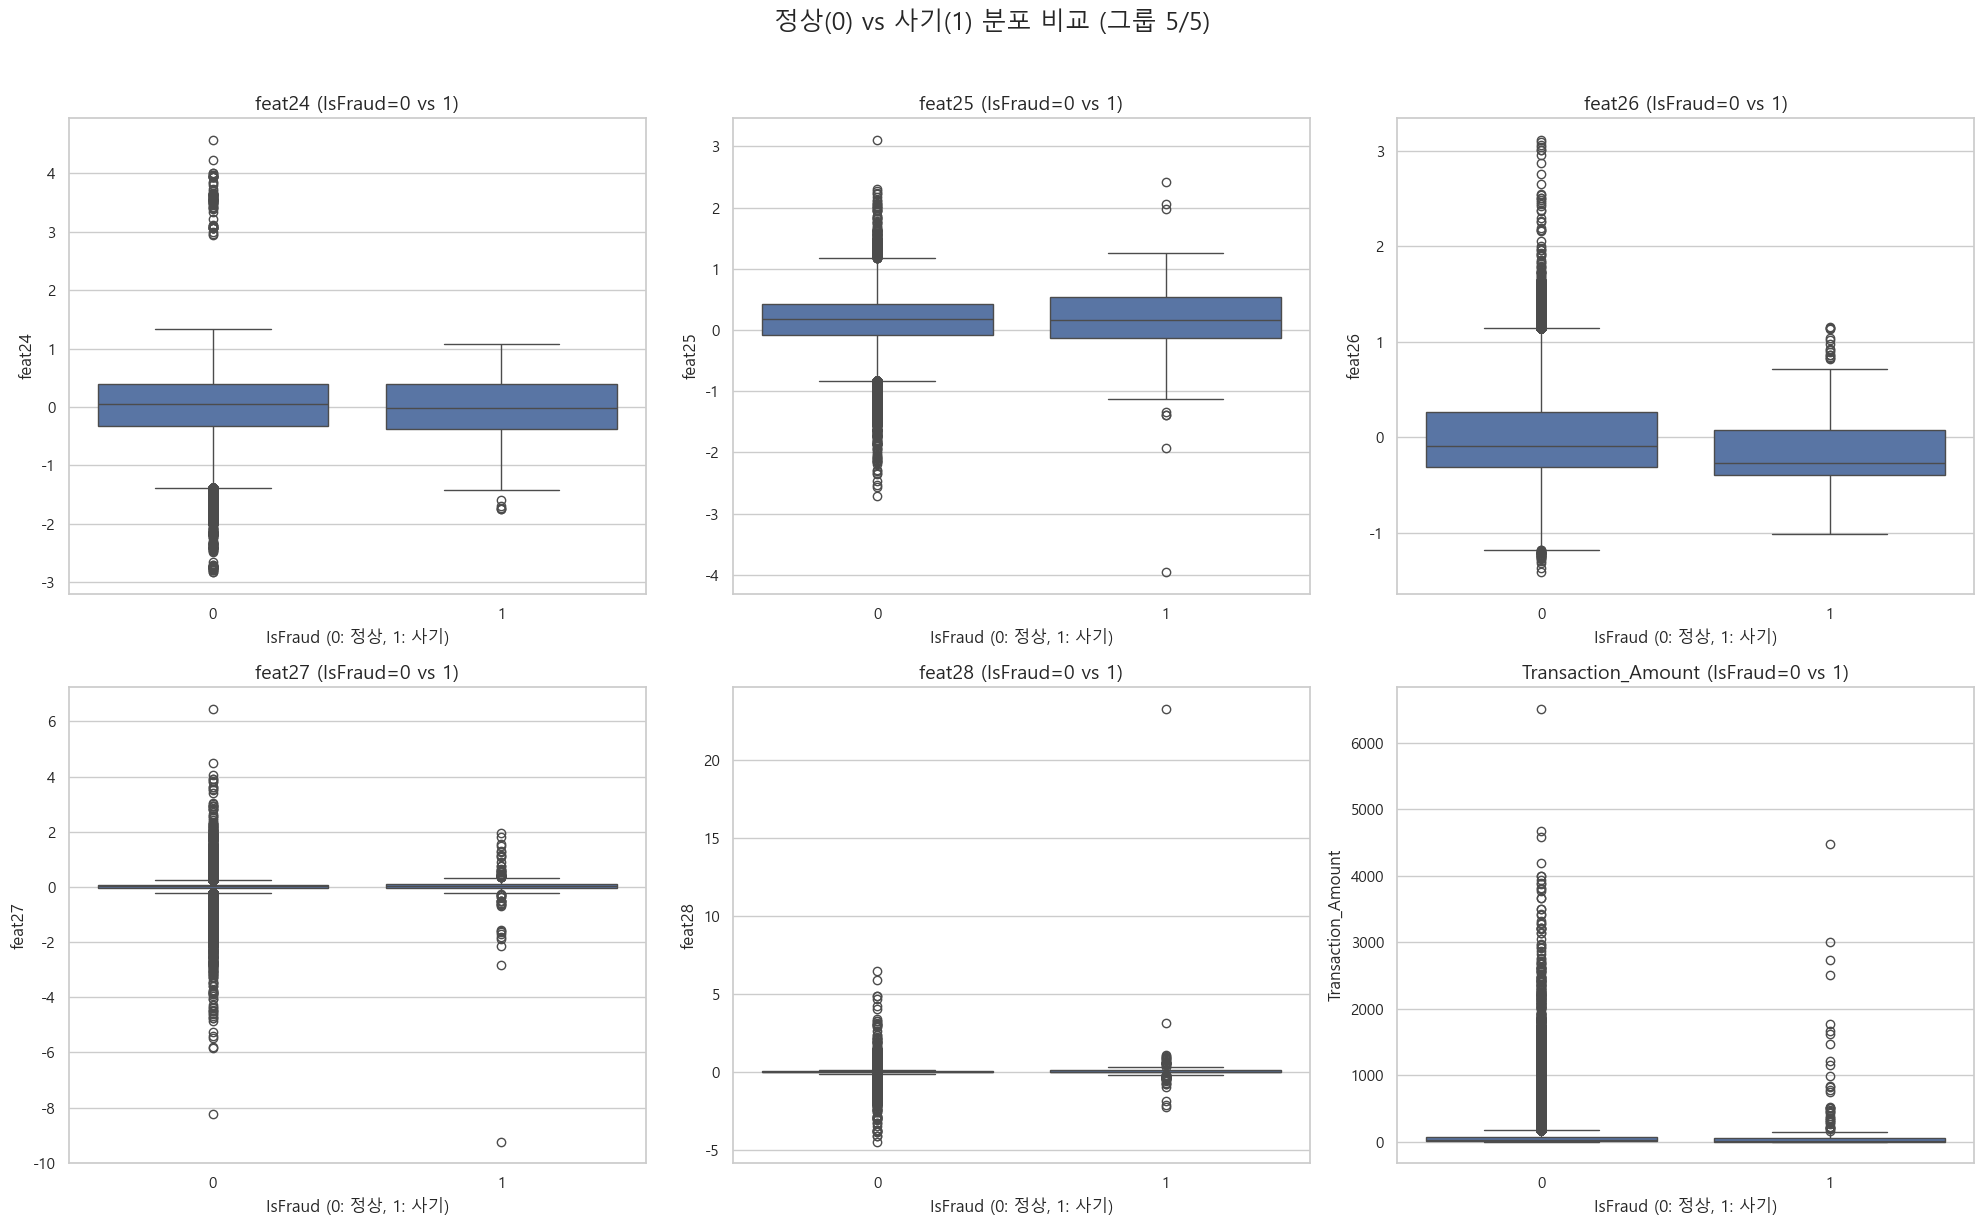

'boxplot_comparison_group_5.png' Ï†ÄÏû• ÏôÑÎ£å.

--- Î™®Îì† Î∞ïÏä§ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å ---


In [13]:
sns.set_style('whitegrid') # Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

features = [col for col in ctrain.columns if col not in ['id', 'IsFraud']]

# 30Í∞ú ÌîºÏ≤òÎ•º 6Í∞úÏî© ÎÇòÎàî (Ï¥ù 5 Í∑∏Î£π)
n_groups = 5
features_per_group = 6

print(f"Ï¥ù {len(features)}Í∞ú ÌîºÏ≤òÎ•º {features_per_group}Í∞úÏî© Î¨∂Ïñ¥ {n_groups}Í∞úÏùò Ï∞®Ìä∏Î°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.")

# --- 4. Î∞ïÏä§ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî (Í∑∏Î£πÎ≥Ñ Î∞òÎ≥µ) ---
for i in range(n_groups):
    # ÌòÑÏû¨ Í∑∏Î£πÏùò ÌîºÏ≤ò ÏÑ†ÌÉù
    current_features = features[i*features_per_group : (i+1)*features_per_group]
    
    # 2Ìñâ 3Ïó¥Ïùò ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f'Ï†ïÏÉÅ(0) vs ÏÇ¨Í∏∞(1) Î∂ÑÌè¨ ÎπÑÍµê (Í∑∏Î£π {i+1}/{n_groups})', fontsize=18, y=1.02)
    
    # axesÎ•º 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÌéºÏπ® (Î∞òÎ≥µÎ¨∏ ÏÇ¨Ïö©Ïù¥ Ìé∏Î¶¨ÌïòÎèÑÎ°ù)
    axes_flat = axes.flatten()
    
    for j, feature in enumerate(current_features):
        # sns.boxplotÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ IsFraud(xÏ∂ï)Ïóê Îî∞Î•∏ feature(yÏ∂ï) Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
        sns.boxplot(data=ctrain, x='IsFraud', y=feature, ax=axes_flat[j])
        axes_flat[j].set_title(f'{feature} (IsFraud=0 vs 1)', fontsize=14)
        axes_flat[j].set_xlabel('IsFraud (0: Ï†ïÏÉÅ, 1: ÏÇ¨Í∏∞)')
        axes_flat[j].set_ylabel(feature)

    # 5. Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†à Î∞è Ï†ÄÏû•
    plt.tight_layout()
    
    plot_filename = f'boxplot_comparison_group_{i+1}.png'
    plt.savefig(plot_filename)
    plt.show() # Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú Î∞îÎ°ú Î≥¥Í∏∞
    
    print(f"'{plot_filename}' Ï†ÄÏû• ÏôÑÎ£å.\n")

print("--- Î™®Îì† Î∞ïÏä§ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å ---")

## ÌîºÏ≤òÎ≥Ñ Ïù¥ÏÉÅÏπò Ï†úÍ±∞

In [14]:
outlier_rules = {
    'feat2': {'upper': 10},
    'feat3': {'upper': 5},
    'feat4': {'upper': 10, 'lower': -5},
    'feat5': {'upper': 10, 'lower': -20},
    'feat6': {'upper': 10, 'lower': -10},
    'feat7': {'upper': 20, 'lower': -30},
    'feat8': {'lower': -20},
    'feat9': {'upper': 7.5},
    'feat10': {'upper': 15, 'lower': -15},
    'feat11': {'upper': 7, 'lower': -4},
    'feat12': {'upper': 4, 'lower': -15},
    'feat13': {'upper': 4, 'lower': -3},
    'feat14': {'upper': 5},
    'feat15': {'upper': 4, 'lower': -3},
    'feat17': {'upper': 6, 'lower': -20},
    'feat18': {'upper': 4},
    'feat19': {'upper': 3, 'lower': -3},
    'feat21': {'upper': 10, 'lower': -10},
    'feat22': {'upper': 4, 'lower': -6},
    'feat23': {'upper': 6, 'lower': -10},
    'feat24': {'upper': 2, 'lower': -2},
    'feat25': {'upper': 3},
    'feat26': {'upper': 1.5, 'lower': -1.2},
    'feat27': {'upper': 3, 'lower': -4},
    'transaction_amount': {'upper': 5000},
}

# --------------------------
# üöÄ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ìï®Ïàò
# --------------------------
def remove_outliers_isfraud0(df, rules):
    df = df.copy()
    df_0 = df[df['IsFraud'] == 0].copy()  # IsFraud=0Îßå Î≥µÏÇ¨
    df_1 = df[df['IsFraud'] == 1].copy()  # IsFraud=1ÏùÄ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ

    before_len = len(df_0)

    for col, bounds in rules.items():
        if col not in df_0.columns:
            continue
        if 'upper' in bounds:
            df_0 = df_0[df_0[col] <= bounds['upper']]
        if 'lower' in bounds:
            df_0 = df_0[df_0[col] >= bounds['lower']]

    after_len = len(df_0)
    removed = before_len - after_len

    print(f"IsFraud=0 Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÏôÑÎ£å: {removed}Í∞ú Ï†úÍ±∞Îê® ({before_len} ‚Üí {after_len})")

    # IsFraud=0 Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ + IsFraud=1 ÏõêÎ≥∏ Î≥ëÌï©
    df_cleaned = pd.concat([df_0, df_1], ignore_index=True)
    return df_cleaned

# Ïã§Ìñâ
ctrain_cleaned = remove_outliers_isfraud0(ctrain, outlier_rules)

print("Ï†ïÏ†ú ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", ctrain_cleaned.shape)

IsFraud=0 Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÏôÑÎ£å: 1094Í∞ú Ï†úÍ±∞Îê® (149731 ‚Üí 148637)
Ï†ïÏ†ú ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (148906, 32)


## train + test Boxplot

Îç∞Ïù¥ÌÑ∞ ÌÜµÌï© ÏôÑÎ£å: {'train': 148906, 'test': 69129}
üìä ÏãúÍ∞ÅÌôî ÎåÄÏÉÅ ÌîºÏ≤ò Ïàò: 30Í∞ú


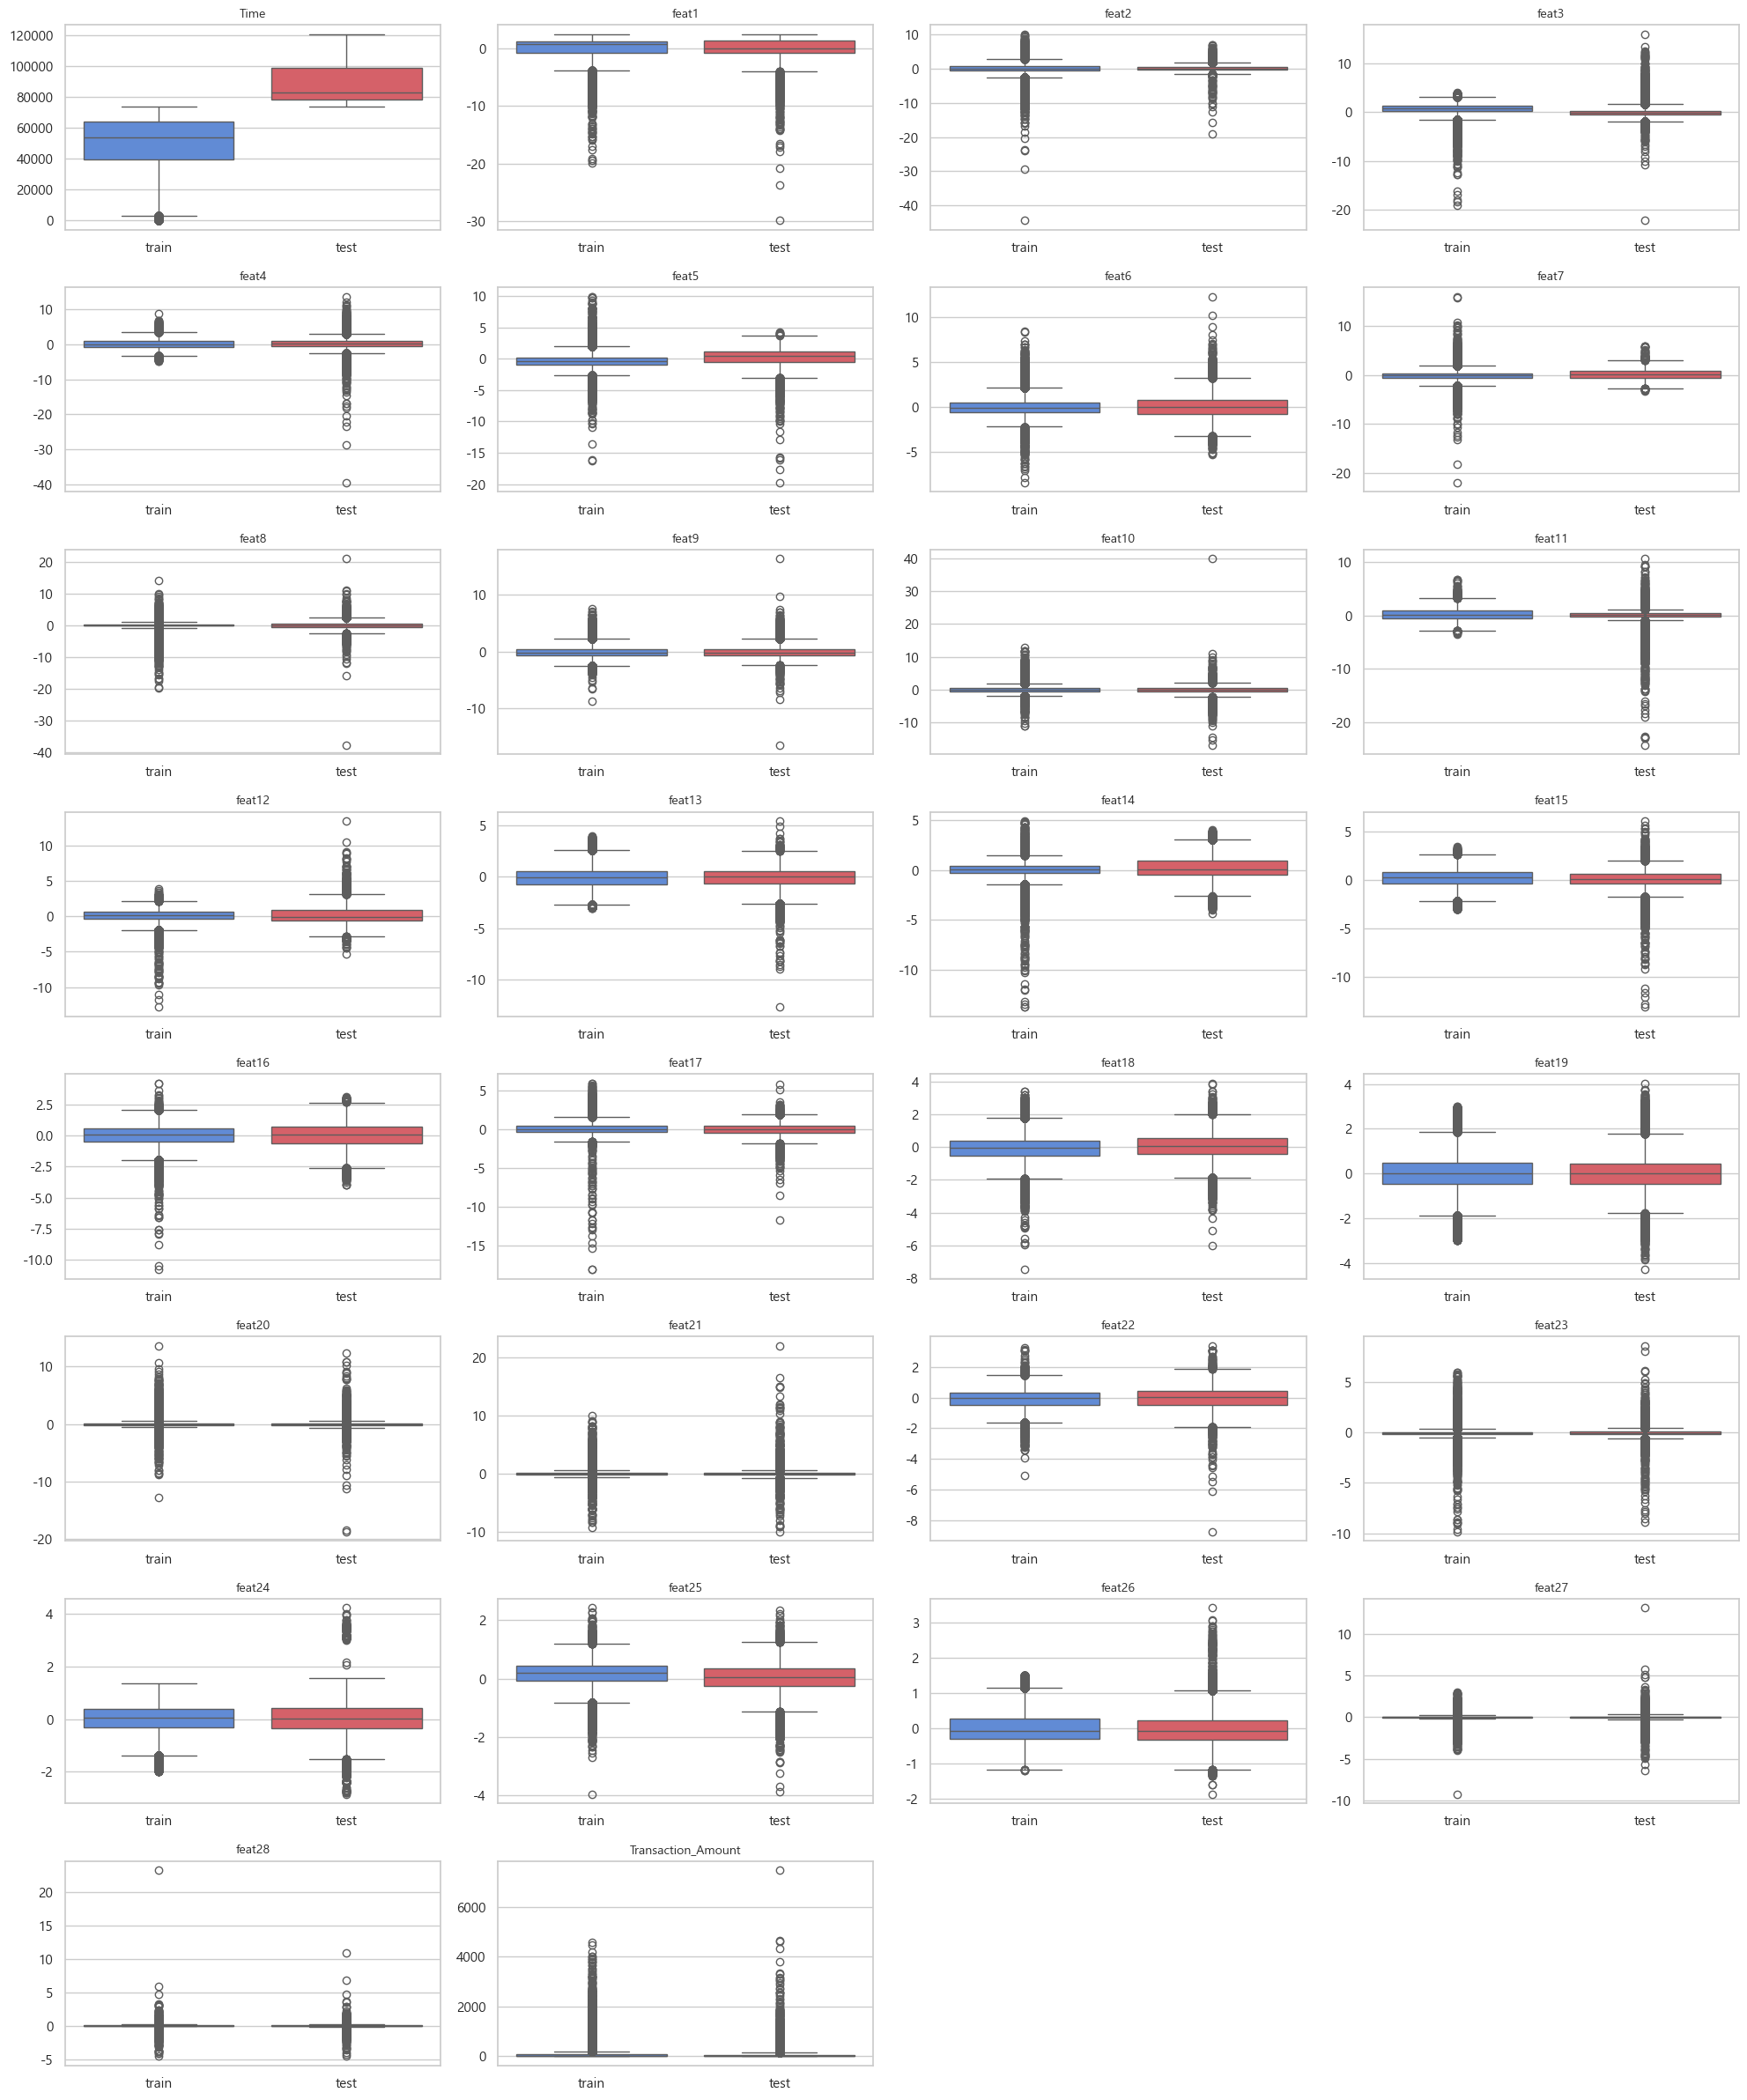

In [15]:
ctrain_cleaned["gubun"] = "train"
ctest["gubun"] = "test"

# 3Ô∏è‚É£ Ìï©ÏπòÍ∏∞
df = pd.concat([ctrain_cleaned, ctest], ignore_index=True)

print("Îç∞Ïù¥ÌÑ∞ ÌÜµÌï© ÏôÑÎ£å:", df["gubun"].value_counts().to_dict())

# 4Ô∏è‚É£ ÏàòÏπòÌòï ÌîºÏ≤òÎßå ÏûêÎèô ÏÑ†ÌÉù (target, id Îì± Ï†úÏô∏)
exclude_cols = ["gubun", "IsFraud", "id", "is_train"]
num_cols = df.select_dtypes(include=["float", "int"]).columns.drop(exclude_cols, errors="ignore").tolist()

print(f"üìä ÏãúÍ∞ÅÌôî ÎåÄÏÉÅ ÌîºÏ≤ò Ïàò: {len(num_cols)}Í∞ú")

# 5Ô∏è‚É£ Boxplot ÏãúÍ∞ÅÌôî
n_cols = 4  # Ìïú Ï§ÑÏóê 4Í∞úÏî©
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Ìñâ Í∞úÏàò ÏûêÎèô Í≥ÑÏÇ∞

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        x="gubun", y=col, data=df,
        ax=axes[i],
        palette={"train": "#4E85E8", "test": "#E84E58"}
    )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Îπà subplot Ïà®Í∏∞Í∏∞
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

* TimeÏùÄ ÌïôÏäµÏóê Ï†ÑÌòÄ Ïì∏Î™®Í∞Ä ÏóÜÎã§

In [16]:
# Ïù¥ÏÉÅÏπò Ï°∞Í±¥ Ï†ïÏùò
outlier_rules = {
    'feat2': {'upper': 10, 'lower': -20},
    'feat5': {'upper': 5},
    'feat6': {'lower': -6},
    'feat7': {'upper': 7, 'lower': -5},
    'feat12': {'lower': -6},
    'feat14': {'upper': 5, 'lower': -5},
    'feat16': {'lower': -5},
    'feat17': {'lower': -13},
    'feat28': {'upper': 20},
}

# --------------------------
# üöÄ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ìï®Ïàò
# --------------------------
def remove_outliers_custom(df, rules):
    df = df.copy()
    before_len = len(df)

    for col, bounds in rules.items():
        if col not in df.columns:
            continue
        if 'upper' in bounds:
            df = df[df[col] <= bounds['upper']]
        if 'lower' in bounds:
            df = df[df[col] >= bounds['lower']]

    after_len = len(df)
    print(f"Ï¥ù Ï†úÍ±∞Îêú Ïù¥ÏÉÅÏπò Í∞úÏàò: {before_len - after_len}Í∞ú ({before_len} ‚Üí {after_len})")
    return df

# Ïã§Ìñâ
ctrain_final = remove_outliers_custom(ctrain_cleaned, outlier_rules)

print("ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", ctrain_final.shape)

Ï¥ù Ï†úÍ±∞Îêú Ïù¥ÏÉÅÏπò Í∞úÏàò: 220Í∞ú (148906 ‚Üí 148686)
ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (148686, 33)


In [17]:
ctrain = ctrain_final
ctrain.shape

(148686, 33)

In [18]:
ctrain = ctrain.drop('gubun', axis=1)
ctest = ctest.drop('gubun', axis=1)

In [19]:
print( ctrain.columns, ctest.columns )

Index(['id', 'Time', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6',
       'feat7', 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13',
       'feat14', 'feat15', 'feat16', 'feat17', 'feat18', 'feat19', 'feat20',
       'feat21', 'feat22', 'feat23', 'feat24', 'feat25', 'feat26', 'feat27',
       'feat28', 'Transaction_Amount', 'IsFraud'],
      dtype='object') Index(['id', 'Time', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6',
       'feat7', 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13',
       'feat14', 'feat15', 'feat16', 'feat17', 'feat18', 'feat19', 'feat20',
       'feat21', 'feat22', 'feat23', 'feat24', 'feat25', 'feat26', 'feat27',
       'feat28', 'Transaction_Amount'],
      dtype='object')


## Heatmap

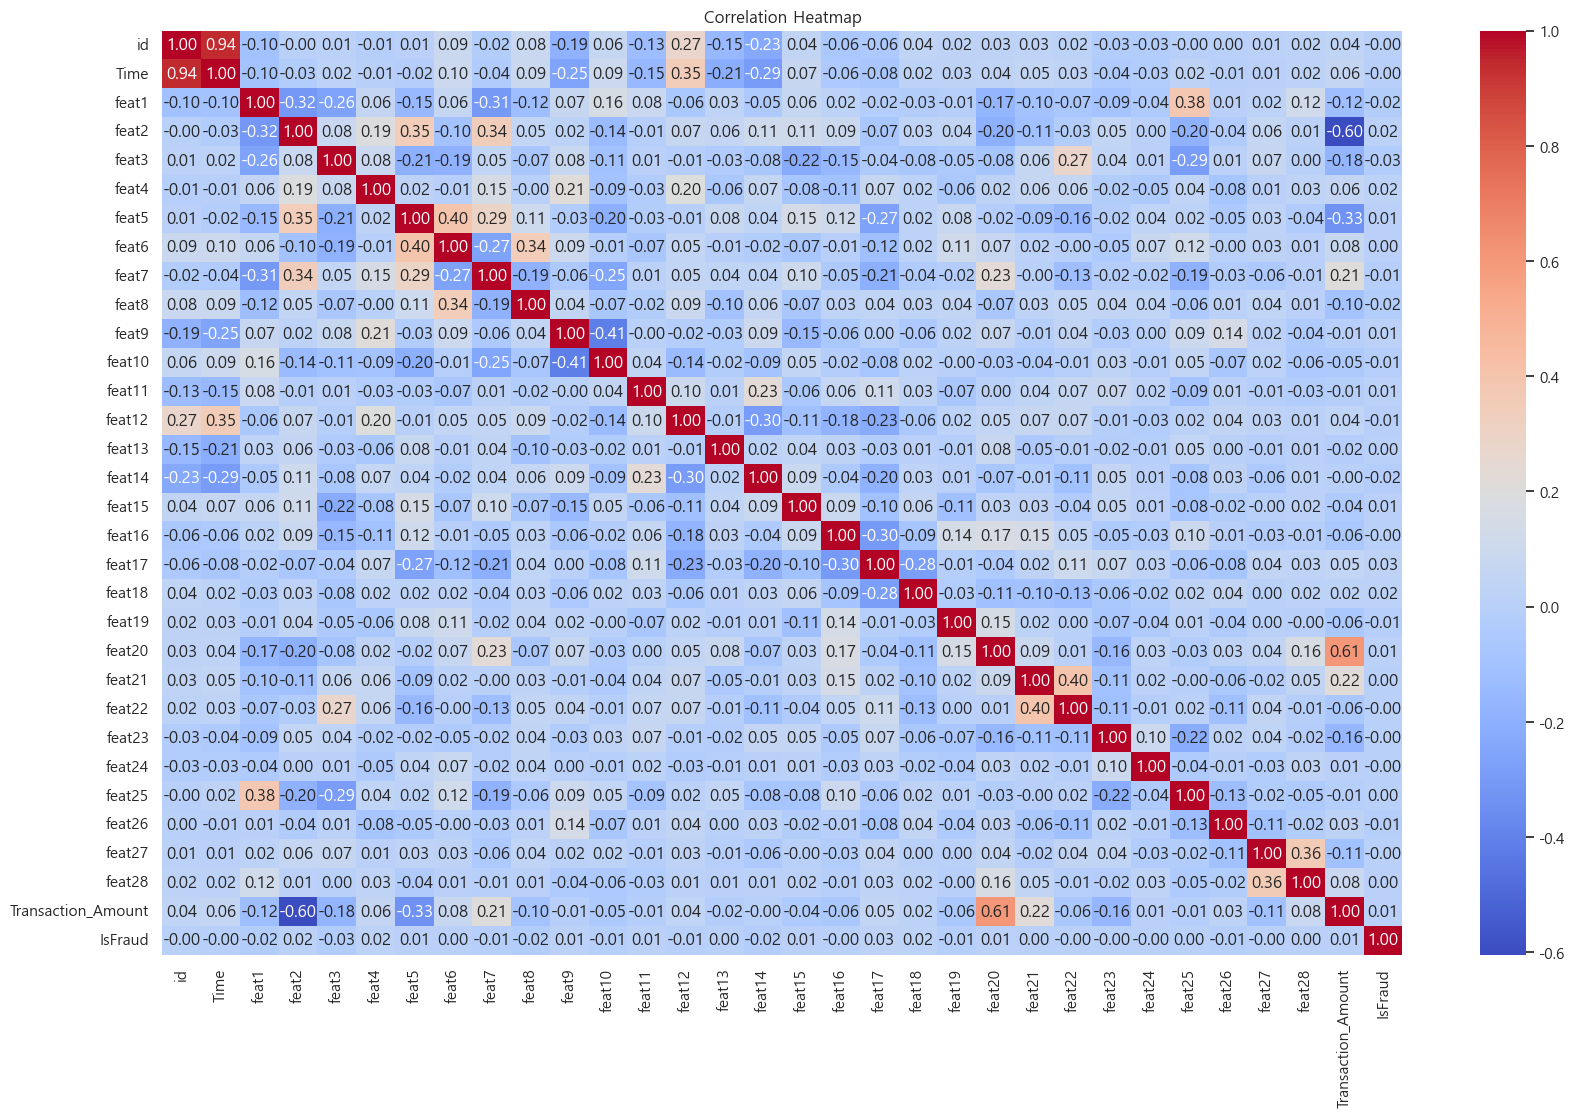

In [20]:
# Calculate correlation matrix
correlation_matrix = ctrain.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## SHAP

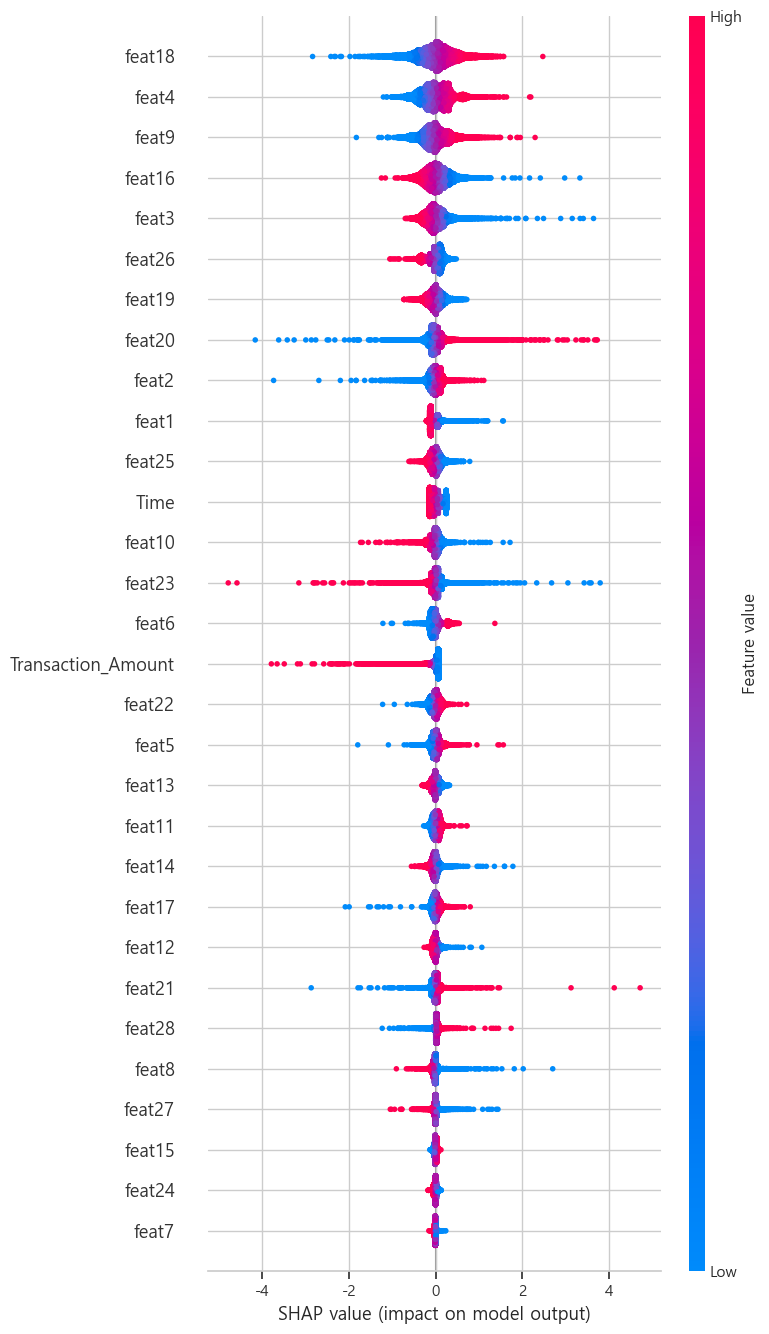

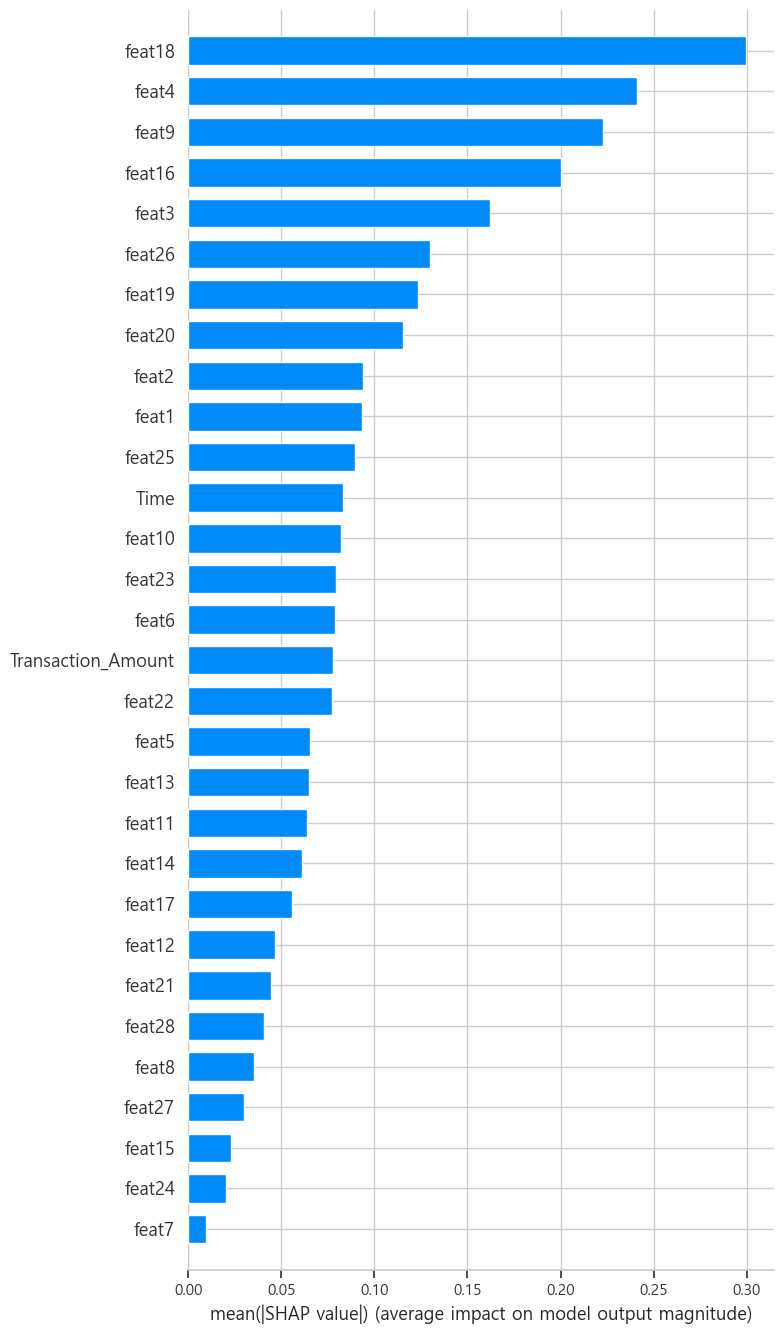

In [21]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])

# ÌèâÍ∑† Ï†àÎåÄÍ∞í Í∏∞Ï§Ä Ï§ëÏöîÎèÑ (Bar Plot)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=X_test.shape[1])

In [22]:
import pandas as pd
from scipy.stats import pearsonr

def independence_test_numeric(df, threshold=0.7):
    numeric_cols = df.select_dtypes(include='number').columns
    results = []

    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            corr, p_value = pearsonr(df[col1], df[col2])
            results.append({
                "Feature1": col1,
                "Feature2": col2,
                "Correlation": corr,
                "p-value": p_value,
                "Dependent?": abs(corr) > threshold and p_value < 0.05
            })

    result_df = pd.DataFrame(results).sort_values(by="Correlation", key=abs, ascending=False)
    return result_df

# ÏÇ¨Ïö© ÏòàÏãú
independence_results = independence_test_numeric(ctrain)
print(independence_results)


    Feature1            Feature2  Correlation   p-value  Dependent?
0         id                Time     0.941192  0.000000        True
449   feat20  Transaction_Amount     0.605637  0.000000       False
116    feat2  Transaction_Amount    -0.603814  0.000000       False
265    feat9              feat10    -0.414511  0.000000       False
171    feat5               feat6     0.401432  0.000000       False
..       ...                 ...          ...       ...         ...
432   feat19              feat22     0.000344  0.894611       False
314   feat11              feat20     0.000271  0.916755       False
492   feat27             IsFraud    -0.000199  0.938934       False
404   feat16             IsFraud    -0.000122  0.962376       False
26        id              feat26     0.000094  0.971081       False

[496 rows x 5 columns]


In [23]:
high_corr = independence_results[abs(independence_results["Correlation"]) >= 0.8]
high_corr = high_corr[high_corr["p-value"] < 0.05]

print(high_corr)

  Feature1 Feature2  Correlation  p-value  Dependent?
0       id     Time     0.941192      0.0        True


<pre>
ÌîºÏ≤òÎì§ Ï†ÑÎ∂Ä ÏàòÏπòÌòïÏù¥ÎùºÏÑú ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ p-valueÎ•º ÌÜµÌïú ÌîºÏ≤òÍ∞Ñ ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
1. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò : Îëê Î≥ÄÏàòÏùò ÏÑ†ÌòïÏ†Å Í¥ÄÎ†®Ïù¥ ÏûàÎäîÏßÄ Ï∏°Ï†ï
2. p-value : Í∑∏ ÏÉÅÍ¥ÄÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïúÏßÄ ÌåêÎã®

    Í≤∞Í≥º -> Î™®Îì† ÌîºÏ≤òÍ∞Ä ÎèÖÎ¶ΩÏ†ÅÏù¥Îã§. Ï¶â Î™®Îç∏Ïóê Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥ÎèÑ Îê®

# Ï†ÑÏ≤òÎ¶¨

## train + test

In [24]:
ctrain[train"] = 1
ctest["is_train"] = 0
"is_
df = pd.concat([ctrain, ctest], axis=0, ignore_index=True)

In [25]:
df.head()

id  Time     feat1     feat2     feat3     feat4     feat5     feat6  \
0   0   0.0  2.074329 -0.129425 -1.137418  0.412846 -0.192638 -1.210144   
1   1   0.0  1.998827 -1.250891 -0.520969 -0.894539 -1.122528 -0.270866   
2   2   0.0  0.091535  1.004517 -0.223445 -0.435249  0.667548 -0.988351   
3   3   0.0  1.979649 -0.184949 -1.064206  0.120125 -0.215238 -0.648829   
4   4   0.0  1.025898 -0.171827  1.203717  1.243900 -0.636572  1.099074   

      feat7     feat8     feat9    feat10    feat11    feat12    feat13  \
0  0.110697 -0.263477  0.742144  0.108782 -1.070243 -0.234910 -1.099360   
1 -1.029289  0.050198 -0.109948  0.908773  0.836798 -0.056580 -0.120990   
2  0.948146 -0.084789 -0.042027 -0.818383 -0.376512 -0.226546 -0.552869   
3 -0.087826 -0.035367  0.885838 -0.007527  0.637441  0.676960 -1.504823   
4 -0.938651  0.569239  0.692665 -0.097495  1.338869  1.391399 -0.128167   

     feat14    feat15    feat16    feat17    feat18    feat19    feat20  \
0  0.502467  0.169318  0.065688 -0.306957 -0.323800  0.103348 -0.292969   
1 -0.144028 -0.039582  1.653057 -0.253599 -0.814354  0.716784  0.065717   
2 -0.886466 -0.180890  0.230286  0.590579 -0.321590 -0.433959 -0.021375   
3  0.554039 -0.824356 -0.527267 -0.095838 -0.312519  0.642659 -0.340089   
4 -0.081836  0.100548 -0.338937  0.090864 -0.423645 -0.731939 -0.203628   

     feat21    feat22    feat23    feat24    feat25    feat26    feat27  \
0 -0.334701 -0.887840  0.336701 -0.110835 -0.291459  0.207733 -0.076576   
1  0.054848 -0.038367  0.133518 -0.461928 -0.465491 -0.464655 -0.009413   
2 -0.326725 -0.803736  0.154495  0.951233 -0.506919  0.085046  0.224458   
3 -0.095514 -0.079792  0.167701 -0.042939  0.000799 -0.096148 -0.057780   
4  0.099157  0.608908  0.027901 -0.262813  0.257834 -0.252829  0.108338   

     feat28  Transaction_Amount  IsFraud  is_train  
0 -0.059577                1.98      0.0         1  
1 -0.038238               84.00      0.0         1  
2  0.087356                2.69      0.0         1  
3 -0.073839                1.00      0.0         1  
4  0.021051                1.00      0.0         1

# 2Ï∞® Ï†êÏàò

In [26]:
# train/test Îã§Ïãú Î∂ÑÎ¶¨
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

models(X, y);

AUC Score: 0.80767


In [27]:
random_state = 8033

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=random_state
)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ‚úÖ Ïã§Ï†ú test_dfÏùò id Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    "IsFraud": y_submit_proba   # ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
})

submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.80767
‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!
submission.csv shape: (69129, 2)


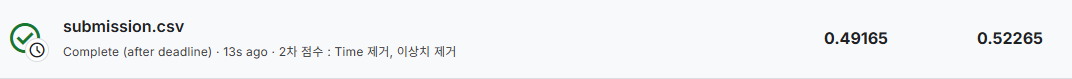

<pre>
1Ï∞® Ï†êÏàò : AUC Score: 0.77421
2Ï∞® Ï†êÏàò : AUC Score: 0.52265 ( LR ) 

## Transaction_Amount

<Axes: >

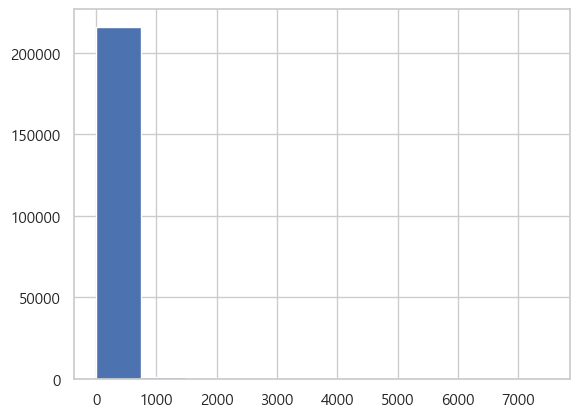

In [29]:
df['Transaction_Amount'].hist()

### Ï†ÑÏ≤¥ ÌèâÍ∑† ÎåÄÎπÑ ÎπÑÏú® / Ï∞®Ïù¥

In [30]:
df["Amount_to_GlobalMean"] = df["Transaction_Amount"] / df["Transaction_Amount"].mean()
df["Amount_GlobalDiff"] = df["Transaction_Amount"] - df["Transaction_Amount"].mean()

### ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÎåÄÎπÑ ÎπÑÏú®

### Ïù¥ÎèôÌèâÍ∑† (Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ Í∏∞Ï§Ä)

In [31]:
if "Time" in df.columns:
    df = df.sort_values("Time")
    df["Amount_Rolling_Mean"] = df["Transaction_Amount"].rolling(window=3, min_periods=1).mean()

## Transaction_Amount Í≥ºÏùò corr()

In [32]:
corr = df[['Transaction_Amount', 'Amount_to_GlobalMean', 'Amount_GlobalDiff',
           'Amount_Rolling_Mean']].corr()
print (corr['Transaction_Amount']) 

Transaction_Amount      1.00000
Amount_to_GlobalMean    1.00000
Amount_GlobalDiff       1.00000
Amount_Rolling_Mean     0.58844
Name: Transaction_Amount, dtype: float64


<pre>
Amount_to_GlobalMean : TAÏôÄ ÏàòÌïôÏ†ÅÏúºÎ°ú ÏÑ†Ìòï Í¥ÄÍ≥Ñ - Ï†úÍ±∞
Amount_GlobalDiff : TAÏôÄ ÏàòÌïôÏ†ÅÏúºÎ°ú ÏÑ†Ìòï Í¥ÄÍ≥Ñ - Ï†úÍ±∞

Amount_Rolling_Mean : Í±∞Îûò ÌùêÎ¶Ñ Ï†ïÎ≥¥, ÎèÖÎ¶ΩÏ†Å ÏùòÎØ∏ ÏûàÏùå

In [33]:
df = df.drop(columns=['Amount_to_GlobalMean','Amount_GlobalDiff'])

# 3Ï∞® Ï†êÏàò

In [34]:
train_df.head()

id  Time     feat1     feat2     feat3     feat4     feat5     feat6  \
0   0   0.0  2.074329 -0.129425 -1.137418  0.412846 -0.192638 -1.210144   
1   1   0.0  1.998827 -1.250891 -0.520969 -0.894539 -1.122528 -0.270866   
2   2   0.0  0.091535  1.004517 -0.223445 -0.435249  0.667548 -0.988351   
3   3   0.0  1.979649 -0.184949 -1.064206  0.120125 -0.215238 -0.648829   
4   4   0.0  1.025898 -0.171827  1.203717  1.243900 -0.636572  1.099074   

      feat7     feat8     feat9    feat10    feat11    feat12    feat13  \
0  0.110697 -0.263477  0.742144  0.108782 -1.070243 -0.234910 -1.099360   
1 -1.029289  0.050198 -0.109948  0.908773  0.836798 -0.056580 -0.120990   
2  0.948146 -0.084789 -0.042027 -0.818383 -0.376512 -0.226546 -0.552869   
3 -0.087826 -0.035367  0.885838 -0.007527  0.637441  0.676960 -1.504823   
4 -0.938651  0.569239  0.692665 -0.097495  1.338869  1.391399 -0.128167   

     feat14    feat15    feat16    feat17    feat18    feat19    feat20  \
0  0.502467  0.169318  0.065688 -0.306957 -0.323800  0.103348 -0.292969   
1 -0.144028 -0.039582  1.653057 -0.253599 -0.814354  0.716784  0.065717   
2 -0.886466 -0.180890  0.230286  0.590579 -0.321590 -0.433959 -0.021375   
3  0.554039 -0.824356 -0.527267 -0.095838 -0.312519  0.642659 -0.340089   
4 -0.081836  0.100548 -0.338937  0.090864 -0.423645 -0.731939 -0.203628   

     feat21    feat22    feat23    feat24    feat25    feat26    feat27  \
0 -0.334701 -0.887840  0.336701 -0.110835 -0.291459  0.207733 -0.076576   
1  0.054848 -0.038367  0.133518 -0.461928 -0.465491 -0.464655 -0.009413   
2 -0.326725 -0.803736  0.154495  0.951233 -0.506919  0.085046  0.224458   
3 -0.095514 -0.079792  0.167701 -0.042939  0.000799 -0.096148 -0.057780   
4  0.099157  0.608908  0.027901 -0.262813  0.257834 -0.252829  0.108338   

     feat28  Transaction_Amount  IsFraud  is_train  
0 -0.059577                1.98      0.0         1  
1 -0.038238               84.00      0.0         1  
2  0.087356                2.69      0.0         1  
3 -0.073839                1.00      0.0         1  
4  0.021051                1.00      0.0         1

In [35]:
# train/test Îã§Ïãú Î∂ÑÎ¶¨
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

models(X, y);

AUC Score: 0.77824


In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=random_state
)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ‚úÖ Ïã§Ï†ú test_dfÏùò id Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    "IsFraud": y_submit_proba   # ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
})

submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.77824
‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!
submission.csv shape: (69129, 2)


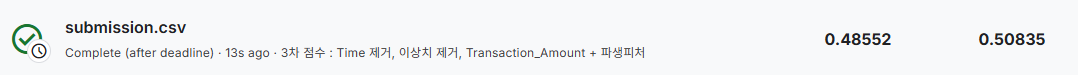

In [37]:
# train/test Îã§Ïãú Î∂ÑÎ¶¨
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time', 'Transaction_Amount'])

models(X, y);

AUC Score: 0.78779


In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time","Transaction_Amount"], errors='ignore')

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=random_state
)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ‚úÖ Ïã§Ï†ú test_dfÏùò id Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    "IsFraud": y_submit_proba   # ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
})

submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.78779
‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!
submission.csv shape: (69129, 2)


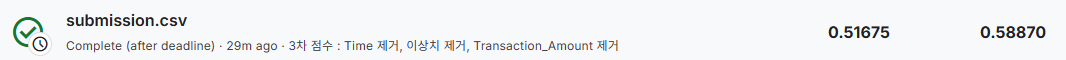

## Ìä∏Î¶¨Ìòï Î™®Îç∏ Î≥ÄÍ≤Ω

In [39]:
def tmodels(X, y, test_size=0.2, random_state=8033):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=random_state, stratify=y )

    model = xgb.XGBClassifier(random_state=random_state)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # ÏÇ¨Í∏∞Ïùº ÌôïÎ•†
    auc = roc_auc_score(y_test, y_proba)

    print(f"AUC Score: {auc:.5f}")
    return model, auc, X_train, X_test, y_train, y_test

In [40]:
# train/test Îã§Ïãú Î∂ÑÎ¶¨
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time', 'Transaction_Amount'])

tmodels(X, y);

AUC Score: 0.68677


In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time","Transaction_Amount"], errors='ignore')

lr_model =xgb.XGBClassifier(random_state=random_state)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ‚úÖ Ïã§Ï†ú test_dfÏùò id Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    "IsFraud": y_submit_proba   # ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
})

submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.68677
‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!
submission.csv shape: (69129, 2)


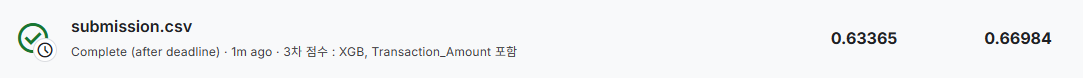

In [42]:
# train/test Îã§Ïãú Î∂ÑÎ¶¨
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

tmodels(X, y);

AUC Score: 0.69793


In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')

lr_model =xgb.XGBClassifier(random_state=random_state)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ‚úÖ Ïã§Ï†ú test_dfÏùò id Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    "IsFraud": y_submit_proba   # ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
})

submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.69793
‚úÖ submission.csv ÏÉùÏÑ± ÏôÑÎ£å!
submission.csv shape: (69129, 2)


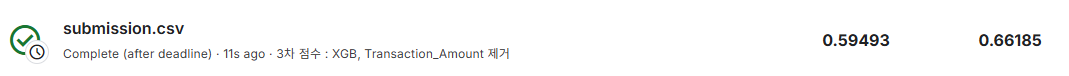

<pre>

2Ï∞® Ï†êÏàò : AUC Score: 0.52265 ( LR ) 
3Ï∞® Ï†êÏàò : AUC Score: 0.50835 ( LR, Transaction_Amount Ìè¨Ìï® )
3Ï∞® Ï†êÏàò : AUC Score: 0.58870 ( LR, Transaction_Amount Ï†úÍ±∞ )
<font color=red>3Ï∞® Ï†êÏàò : AUC Score: 0.66984 ( XGB, Transaction_Amount Ìè¨Ìï® ) -- 0.66984</font>
3Ï∞® Ï†êÏàò : AUC Score: 0.66185 ( XGB, Transaction_Amount Ï†úÍ±∞ )

## Scaling

In [44]:
df.describe()

id           Time          feat1          feat2  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean   109785.576710   62456.807194       0.107149       0.009729   
std     63301.485524   25637.973166       1.356449       0.983166   
min         0.000000       0.000000     -29.807725     -19.105436   
25%     54934.500000   47964.000000      -0.844258      -0.547475   
50%    109919.000000   63332.000000       0.400664      -0.006858   
75%    164674.500000   77556.000000       1.191058       0.634218   
max    219128.000000  120580.000000       2.430494       9.331221   

               feat3          feat4          feat5          feat6  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean        0.481239       0.119943      -0.088274       0.101703   
std         1.024566       1.199563       1.130487       1.211210   
min       -22.092656     -39.517039     -19.722872      -5.263650   
25%        -0.190850      -0.652738      -0.847150      -0.646578   
50%         0.503400       0.100678      -0.146539      -0.065144   
75%         1.158065       0.936238       0.583315       0.575482   
max        15.878405      13.678867       4.988954      12.268942   

               feat7          feat8          feat9         feat10  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean       -0.070161       0.127797      -0.059289      -0.024272   
std         0.826271       0.793613       1.082800       0.790760   
min        -4.993424     -37.591259     -16.357833     -16.735707   
25%        -0.646846      -0.158379      -0.724243      -0.495579   
50%        -0.083814       0.098132      -0.170739      -0.072626   
75%         0.479550       0.443698       0.456493       0.474748   
max         6.898794      20.976643      16.233967      39.824099   

              feat11         feat12         feat13         feat14  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean        0.151865       0.040227      -0.097298       0.079652   
std         0.917294       0.994033       1.039219       0.855320   
min       -24.162600      -5.270577     -12.630865      -4.967344   
25%        -0.367783      -0.492409      -0.719086      -0.370141   
50%         0.090464       0.072936      -0.024858       0.039857   
75%         0.770189       0.664984       0.588964       0.509031   
max        10.577848      13.423914       5.406614       4.836332   

              feat15         feat16         feat17         feat18  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean        0.156895       0.016406       0.027872      -0.033052   
std         0.880259       0.826729       0.688328       0.780821   
min       -13.089908      -4.838639     -11.739570      -5.985590   
25%        -0.352927      -0.498028      -0.407828      -0.496633   
50%         0.180773       0.064491      -0.000908      -0.039384   
75%         0.772908       0.581368       0.446515       0.445963   
max         6.074859       4.180925       5.926491       3.883498   

              feat19         feat20         feat21         feat22  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean       -0.007855       0.009070      -0.031019      -0.050563   
std         0.735435       0.418415       0.393349       0.595559   
min        -4.281628     -18.679066      -9.981414      -8.748979   
25%        -0.461679      -0.167569      -0.190194      -0.472926   
50%        -0.002702      -0.037643      -0.042936      -0.032639   
75%         0.454921       0.126535       0.108801       0.354932   
max         4.031429      12.349838      22.003517       3.390957   

              feat23         feat24         feat25         feat26  \
count  217815.000000  217815.000000  217815.000000  217815.000000   
mean       -0.051172      -0.002957       0.123885       0.008549   
std         0.298019       0.588024       0.405668       0.470797   
min       

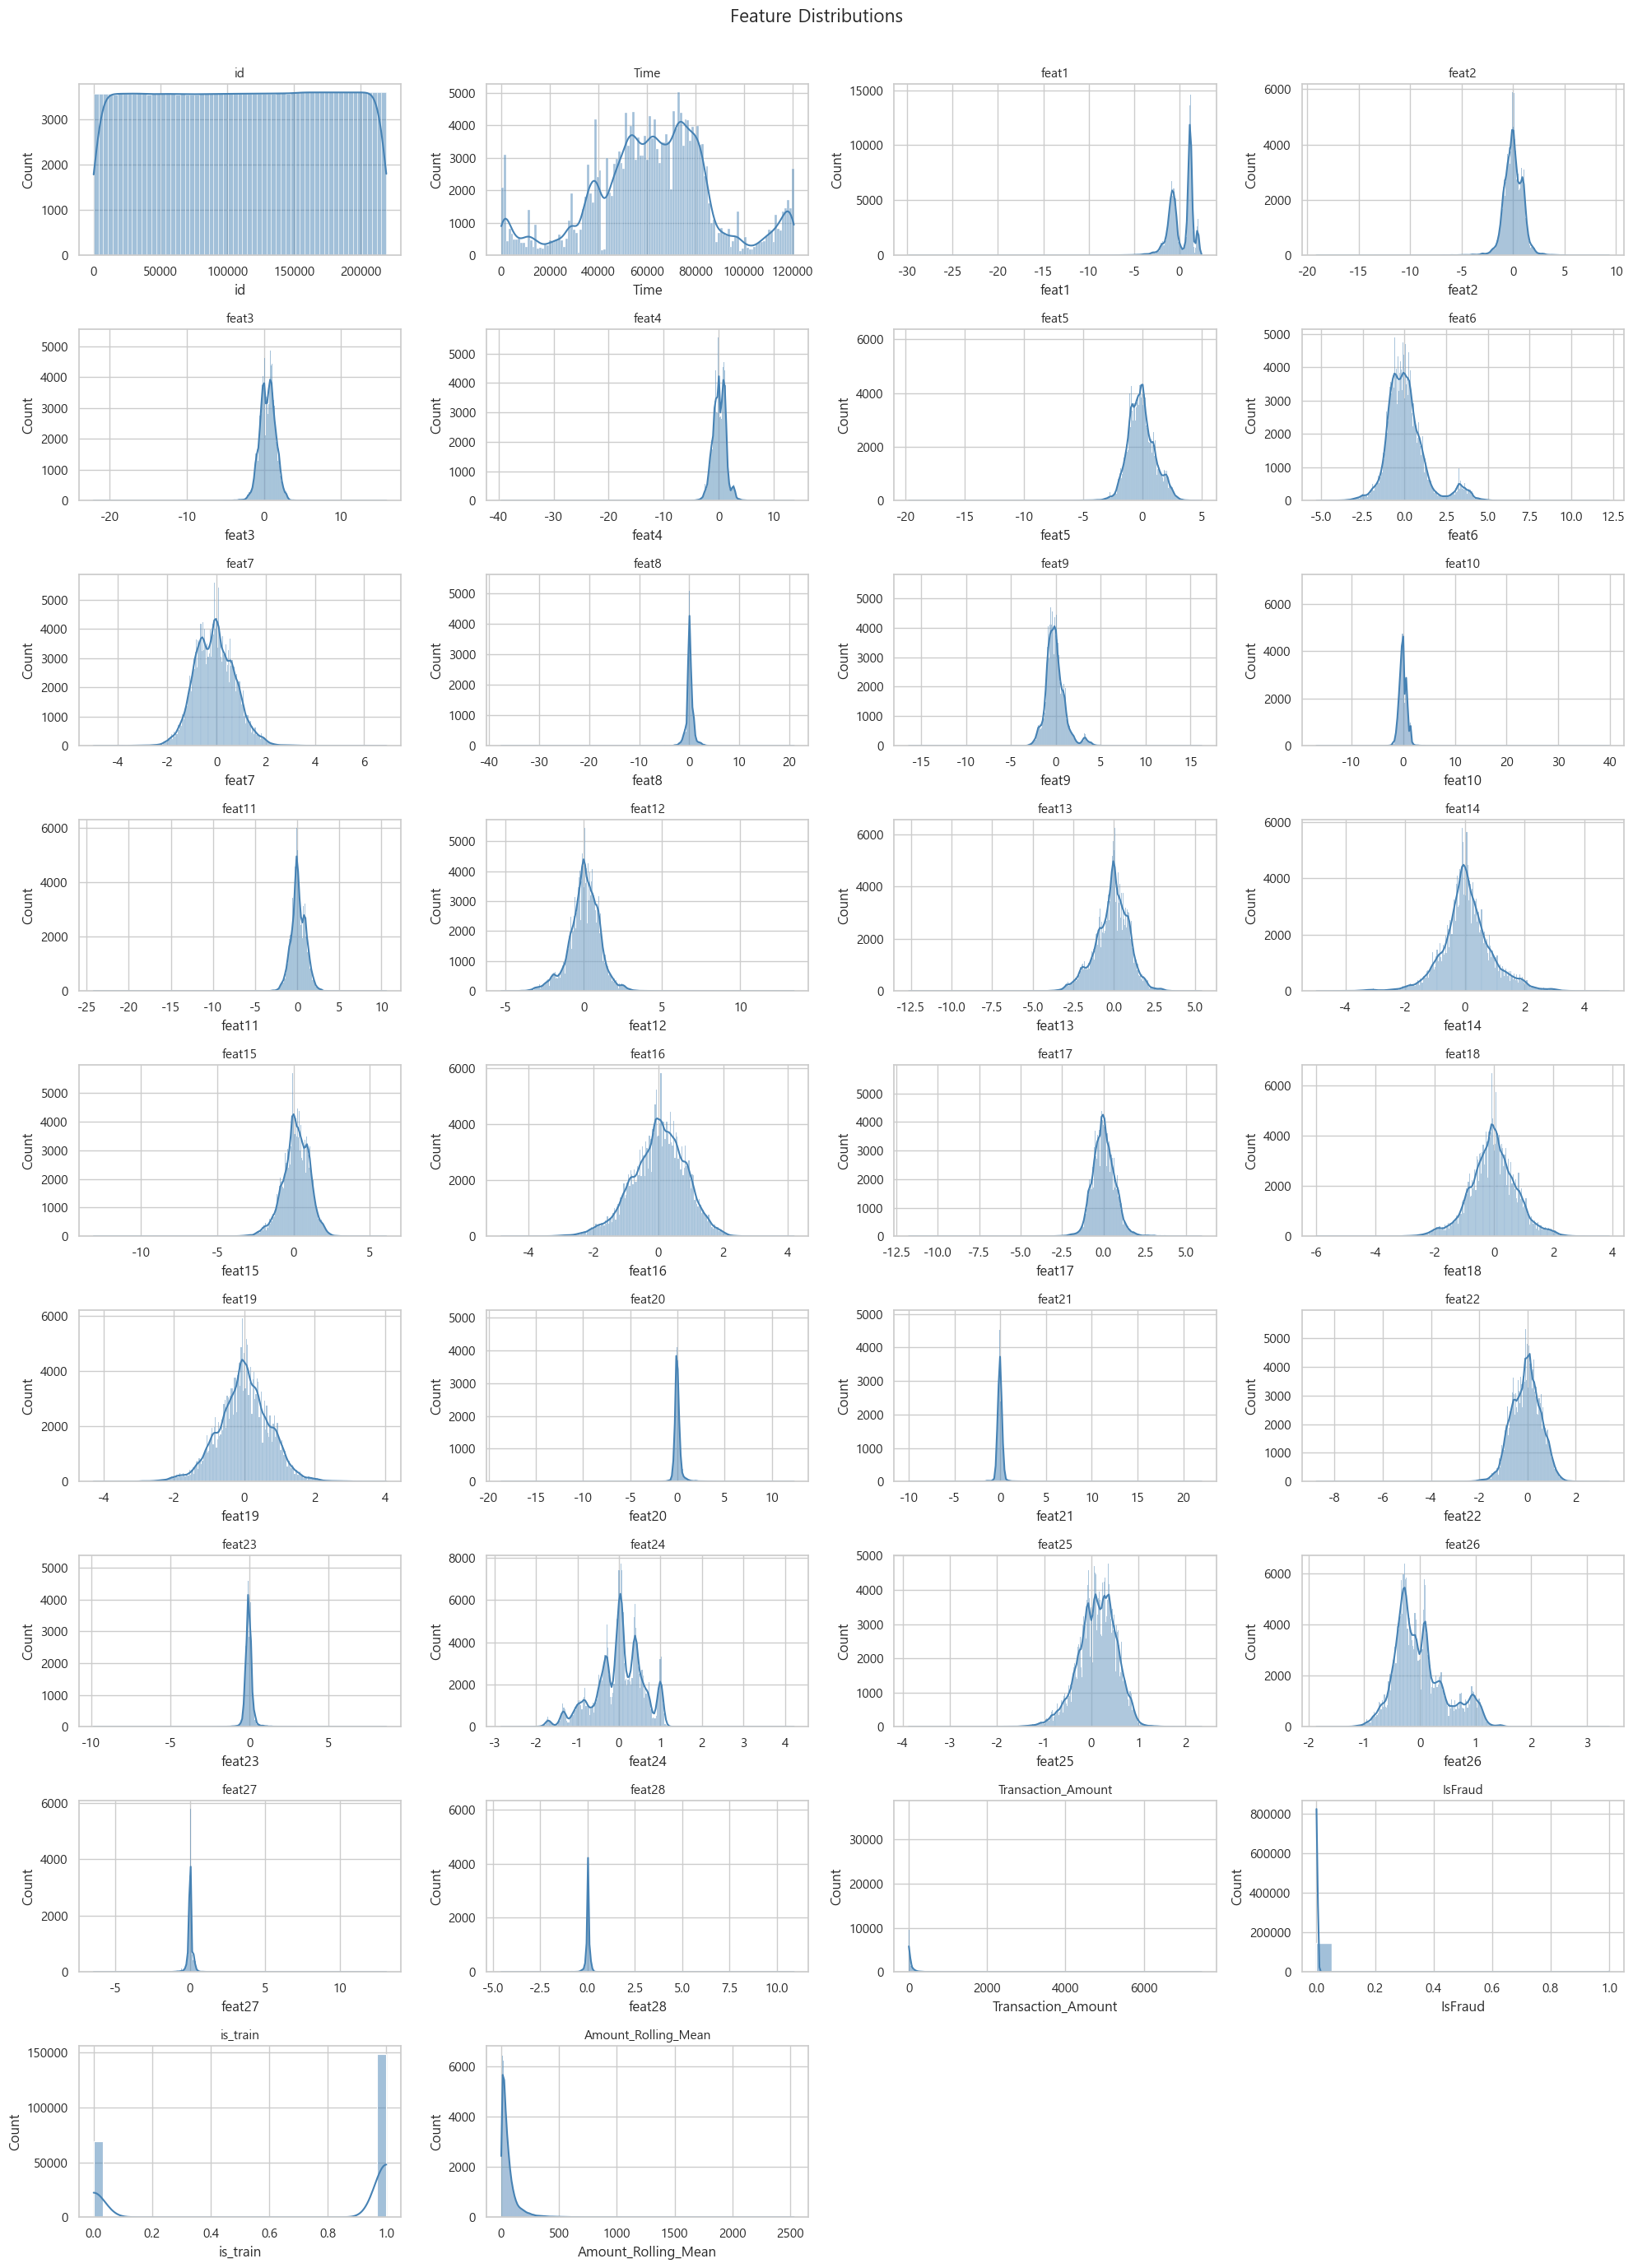

In [45]:
import math
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Ìñâ/Ïó¥ Í∞úÏàò ÏÑ§Ï†ï
cols = 4  # Ìïú ÌñâÏóê 4Í∞úÏî©
rows = math.ceil(len(numeric_cols) / cols)

# Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(20, rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(col, fontsize=11)
    plt.tight_layout()

plt.suptitle("Feature Distributions", fontsize=16, y=1.02)
plt.show()

# Î™®Îç∏ ÍµêÏ≤¥ (Í∏∞Ï°¥ Î™®Îç∏ : Logistic Regression, XGBClassifier )

In [46]:
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

In [47]:
model_list = { "LogisticRegression": LogisticRegression(max_iter=1000, random_state=random_state), 
               "DecisionTree": DecisionTreeClassifier(random_state=random_state), 
               "RandomForest": RandomForestClassifier(random_state=random_state), 
               "GradientBoosting": GradientBoostingClassifier(random_state=random_state), 
               "LightGBM": lgb.LGBMClassifier(random_state=random_state, verbosity=-1), 
               "XGBoost": xgb.XGBClassifier(random_state=random_state) }

# Ï†úÏ∂úÏö© feature Ï§ÄÎπÑ
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors="ignore")

for name, model in model_list.items():
    print(f"\nüöÄ {name} Î™®Îç∏Î°ú Ï†ÑÏ≤¥ train Ïû¨ÌïôÏäµ Ï§ë...")

    # 1Ô∏è‚É£ Ï†ÑÏ≤¥ train Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµ
    model.fit(X, y)

    # 2Ô∏è‚É£ ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
    y_submit_proba = model.predict_proba(X_submit)[:, 1]

    # 3Ô∏è‚É£ submission DataFrame ÏÉùÏÑ±
    submission = pd.DataFrame({
        "id": test_df["id"],
        "IsFraud": y_submit_proba
    })

    # 4Ô∏è‚É£ CSV ÌååÏùº Ï†ÄÏû• (Î™®Îç∏ Ïù¥Î¶Ñ Ìè¨Ìï®)
    filename = f"submission_{name}.csv"
    submission.to_csv(filename, index=False)

    print(f"‚úÖ {filename} ÏÉùÏÑ± ÏôÑÎ£å! (Ìñâ Ïàò: {len(submission)})")

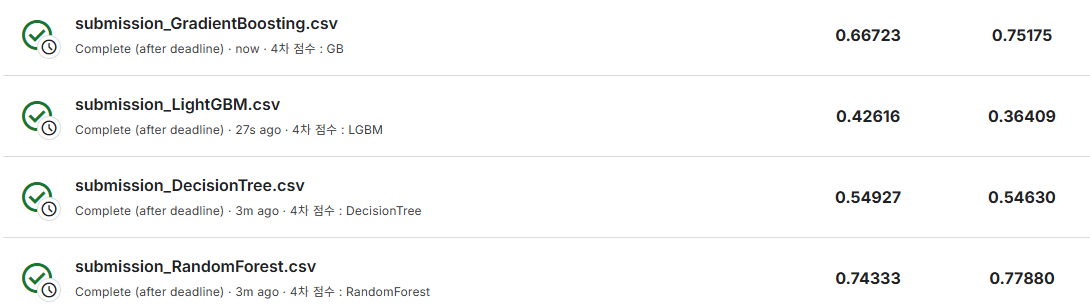

<pre>
2Ï∞® Ï†êÏàò : AUC Score: 0.52265 ( LR ) 
3Ï∞® Ï†êÏàò : AUC Score: 0.50835 ( LR, Transaction_Amount Ìè¨Ìï® )
3Ï∞® Ï†êÏàò : AUC Score: 0.58870 ( LR, Transaction_Amount Ï†úÍ±∞ )
3Ï∞® Ï†êÏàò : AUC Score: 0.66984 ( XGB, Transaction_Amount Ìè¨Ìï® )
3Ï∞® Ï†êÏàò : AUC Score: 0.66185 ( XGB, Transaction_Amount Ï†úÍ±∞ )
<font color=red>4Ï∞® Ï†êÏàò : AUC Score : 0.77880 ( RandomForest )</font>

## TA Ï†úÍ±∞ ÌõÑ Í≤∞Í≥º

In [51]:
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time', "Transaction_Amount"])

In [52]:
random_state=8033

model_list = {  
               "RandomForest": RandomForestClassifier(random_state=random_state) }

# Ï†úÏ∂úÏö© feature Ï§ÄÎπÑ
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time", "Transaction_Amount"], errors="ignore")

for name, model in model_list.items():
    print(f"\nüöÄ {name} Î™®Îç∏Î°ú Ï†ÑÏ≤¥ train Ïû¨ÌïôÏäµ Ï§ë...")

    # 1Ô∏è‚É£ Ï†ÑÏ≤¥ train Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµ
    model.fit(X, y)

    # 2Ô∏è‚É£ ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
    y_submit_proba = model.predict_proba(X_submit)[:, 1]

    # 3Ô∏è‚É£ submission DataFrame ÏÉùÏÑ±
    submission = pd.DataFrame({
        "id": test_df["id"],
        "IsFraud": y_submit_proba
    })

    # 4Ô∏è‚É£ CSV ÌååÏùº Ï†ÄÏû• (Î™®Îç∏ Ïù¥Î¶Ñ Ìè¨Ìï®)
    filename = f"submission_{name}.csv"
    submission.to_csv(filename, index=False)

    print(f"‚úÖ {filename} ÏÉùÏÑ± ÏôÑÎ£å! (Ìñâ Ïàò: {len(submission)})")


üöÄ RandomForest Î™®Îç∏Î°ú Ï†ÑÏ≤¥ train Ïû¨ÌïôÏäµ Ï§ë...
‚úÖ submission_RandomForest.csv ÏÉùÏÑ± ÏôÑÎ£å! (Ìñâ Ïàò: 69129)


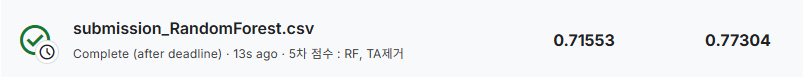

* TA Ï†úÍ±∞ ÏïàÌïúÍ≤å Ï†êÏàò Îçî Ï¢ãÏùå

## SMOTE Ï†ÅÏö© ÌõÑ AUC ÏàúÏúÑ

In [ ]:
random_state = 8033

# ----------------------------
# 1Ô∏è‚É£ Ï†úÏ∂úÏö© feature Ï§ÄÎπÑ
# ----------------------------
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors="ignore")

# ----------------------------
# 2Ô∏è‚É£ SMOTE + Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏ÏúºÎ°ú Ï†ÑÏ≤¥ train Ïû¨ÌïôÏäµ ÌõÑ submission ÏÉùÏÑ±
# ----------------------------
for name, model in model_list.items():
    print(f"\nüöÄ {name} Î™®Îç∏ ÌïôÏäµ Î∞è Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± Ï§ë...")

    # ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò (SMOTE ‚Üí Î™®Îç∏)
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=random_state)),
        ('model', model)
    ])
    
    # Ï†ÑÏ≤¥ trainÏúºÎ°ú ÌïôÏäµ
    pipe.fit(X, y)

    # test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÌôïÎ•†
    y_submit_proba = pipe.predict_proba(X_submit)[:, 1]

    # submission DataFrame ÏÉùÏÑ±
    submission = pd.DataFrame({
        "id": test_df["id"],
        "IsFraud": y_submit_proba
    })

    # Î™®Îç∏Î™ÖÏúºÎ°ú ÌååÏùº Ï†ÄÏû•
    filename = f"submission_{name}_SMOTE.csv"
    submission.to_csv(filename, index=False)
    
    print(f"‚úÖ {filename} Ï†ÄÏû• ÏôÑÎ£å! (rows: {len(submission)})")

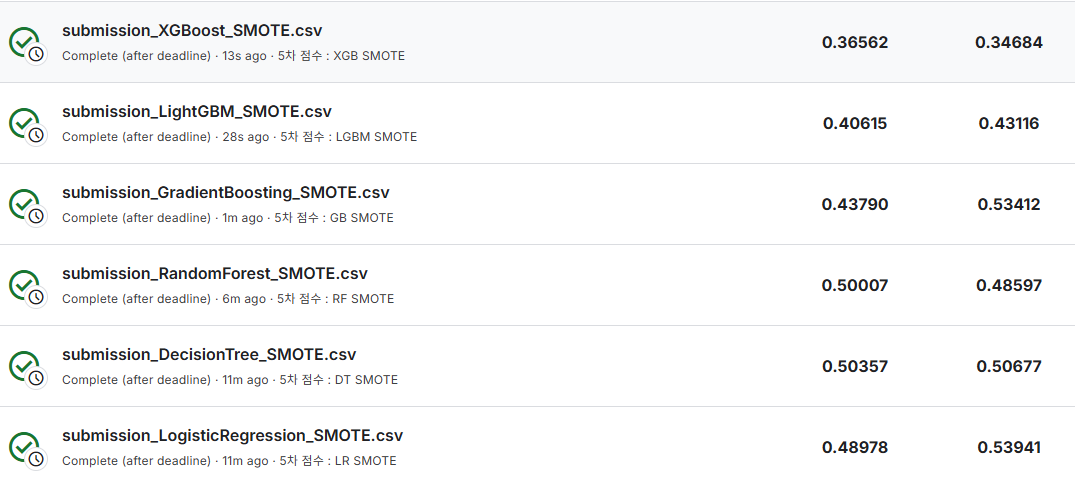

* SMOTEÎäî ÌïòÏßÄÎßêÏûê

# Optuna ÌäúÎãù
* RandomForestClassifier( random_state = random_state )  AUC: 0.77880

In [58]:
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target Î∂ÑÎ¶¨
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [61]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np
import pandas as pd

# ----------------------------
# 0Ô∏è‚É£ Í∏∞Î≥∏ ÏÑ§Ï†ï
# ----------------------------
random_state = 8033
n_trials = 5  # ÌÉêÏÉâ ÌöüÏàò (ÏõêÌïòÎ©¥ ÎäòÎ¶¥ Ïàò ÏûàÏùå)

# ----------------------------
# 1Ô∏è‚É£ Optuna Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
# ----------------------------
def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])

    # Î™®Îç∏ Ï†ïÏùò
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,  # ‚úÖ Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ï
        random_state=random_state,
        n_jobs=-1
    )

    # Stratified K-Fold ÏÑ§Ï†ï
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # ÍµêÏ∞®Í≤ÄÏ¶ù AUC Í≥ÑÏÇ∞
    auc_scores = cross_val_score(
        model, X, y,
        cv=skf,
        scoring=make_scorer(roc_auc_score, needs_proba=True),
        n_jobs=-1
    )

    mean_auc = np.mean(auc_scores)

    # ‚úÖ ÏßÑÌñâÏÉÅÌô© Ïã§ÏãúÍ∞Ñ Ï∂úÎ†•
    print(f"[Trial {trial.number+1}/{n_trials}] "
          f"AUC={mean_auc:.5f} | "
          f"Params: n_estimators={n_estimators}, max_depth={max_depth}, "
          f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, "
          f"max_features={max_features}, bootstrap={bootstrap}")

    return mean_auc

# ----------------------------
# 2Ô∏è‚É£ Optuna Ïä§ÌÑ∞Îîî Ïã§Ìñâ
# ----------------------------
print(f"\nüöÄ Optuna RandomForest ÌäúÎãù ÏãúÏûë ({n_trials}Ìöå ÌÉêÏÉâ)...\n")

study = optuna.create_study(direction='maximize', study_name='RF_AUC_Opt')
study.optimize(objective, n_trials=n_trials, timeout=3600, show_progress_bar=True)

# ----------------------------
# 3Ô∏è‚É£ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≤∞Í≥º
# ----------------------------
print("\nüèÜ Best AUC Score:", study.best_value)
print("üîß Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# ----------------------------
# 4Ô∏è‚É£ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏµúÏ¢Ö Î™®Îç∏ Ïû¨ÌïôÏäµ
# ----------------------------
best_rf = RandomForestClassifier(
    **study.best_params,
    random_state=random_state,
    n_jobs=-1
)
best_rf.fit(X, y)

# ----------------------------
# 5Ô∏è‚É£ test_df ÏòàÏ∏° Î∞è submission ÏÉùÏÑ±
# ----------------------------
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')
y_submit_proba = best_rf.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],
    "IsFraud": y_submit_proba
})

submission.to_csv("submission_RandomForest_Optuna.csv", index=False)
print("\n‚úÖ submission_RandomForest_Optuna.csv ÏÉùÏÑ± ÏôÑÎ£å!")


[I 2025-10-27 14:02:11,758] A new study created in memory with name: RF_AUC_Opt



üöÄ Optuna RandomForest ÌäúÎãù ÏãúÏûë (5Ìöå ÌÉêÏÉâ)...



 20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                         | 1/5 [00:43<02:55, 43.83s/it, 43.83/3600 seconds]

[Trial 1/5] AUC=nan | Params: n_estimators=332, max_depth=3, min_samples_split=13, min_samples_leaf=3, max_features=sqrt, bootstrap=False
[W 2025-10-27 14:02:55,576] Trial 0 failed with parameters: {'n_estimators': 332, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:02:55,586] Trial 0 failed with value np.float64(nan).


 40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                      | 2/5 [04:25<07:25, 148.63s/it, 265.82/3600 seconds]

[Trial 2/5] AUC=nan | Params: n_estimators=155, max_depth=5, min_samples_split=16, min_samples_leaf=9, max_features=None, bootstrap=False
[W 2025-10-27 14:06:37,581] Trial 1 failed with parameters: {'n_estimators': 155, 'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:06:37,583] Trial 1 failed with value np.float64(nan).


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                    | 3/5 [06:27<04:32, 136.14s/it, 387.09/3600 seconds]

[Trial 3/5] AUC=nan | Params: n_estimators=435, max_depth=8, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, bootstrap=True
[W 2025-10-27 14:08:38,841] Trial 2 failed with parameters: {'n_estimators': 435, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:08:38,850] Trial 2 failed with value np.float64(nan).


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                  | 4/5 [07:25<01:45, 105.36s/it, 445.27/3600 seconds]

[Trial 4/5] AUC=nan | Params: n_estimators=273, max_depth=6, min_samples_split=13, min_samples_leaf=9, max_features=sqrt, bootstrap=True
[W 2025-10-27 14:09:37,021] Trial 3 failed with parameters: {'n_estimators': 273, 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:09:37,030] Trial 3 failed with value np.float64(nan).


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [10:26<00:00, 125.39s/it, 626.93/3600 seconds]

[Trial 5/5] AUC=nan | Params: n_estimators=363, max_depth=14, min_samples_split=14, min_samples_leaf=10, max_features=sqrt, bootstrap=False
[W 2025-10-27 14:12:38,687] Trial 4 failed with parameters: {'n_estimators': 363, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False, 'class_weight': 'balanced'} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:12:38,689] Trial 4 failed with value np.float64(nan).


ValueError: No trials are completed yet.

In [56]:
import numpy as np
print("NaN count:", np.isnan(X_train).sum())
print("Inf count:", np.isinf(X_train).sum())
print("Target distribution:", np.unique(y_train, return_counts=True))

NaN count: feat1                  0
feat2                  0
feat3                  0
feat4                  0
feat5                  0
feat6                  0
feat7                  0
feat8                  0
feat9                  0
feat10                 0
feat11                 0
feat12                 0
feat13                 0
feat14                 0
feat15                 0
feat16                 0
feat17                 0
feat18                 0
feat19                 0
feat20                 0
feat21                 0
feat22                 0
feat23                 0
feat24                 0
feat25                 0
feat26                 0
feat27                 0
feat28                 0
Transaction_Amount     0
Amount_Rolling_Mean    0
dtype: int64
Inf count: feat1                  0
feat2                  0
feat3                  0
feat4                  0
feat5                  0
feat6                  0
feat7                  0
feat8                  0
feat9          

# ÏµúÏ¢Ö Ï†êÏàò (5Îì±)
* https://www.kaggle.com/competitions/credit-card-fraud-prediction/submissions

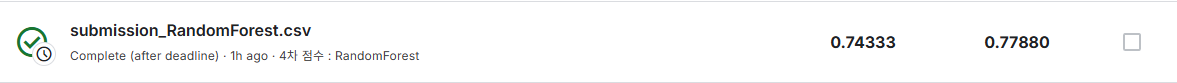

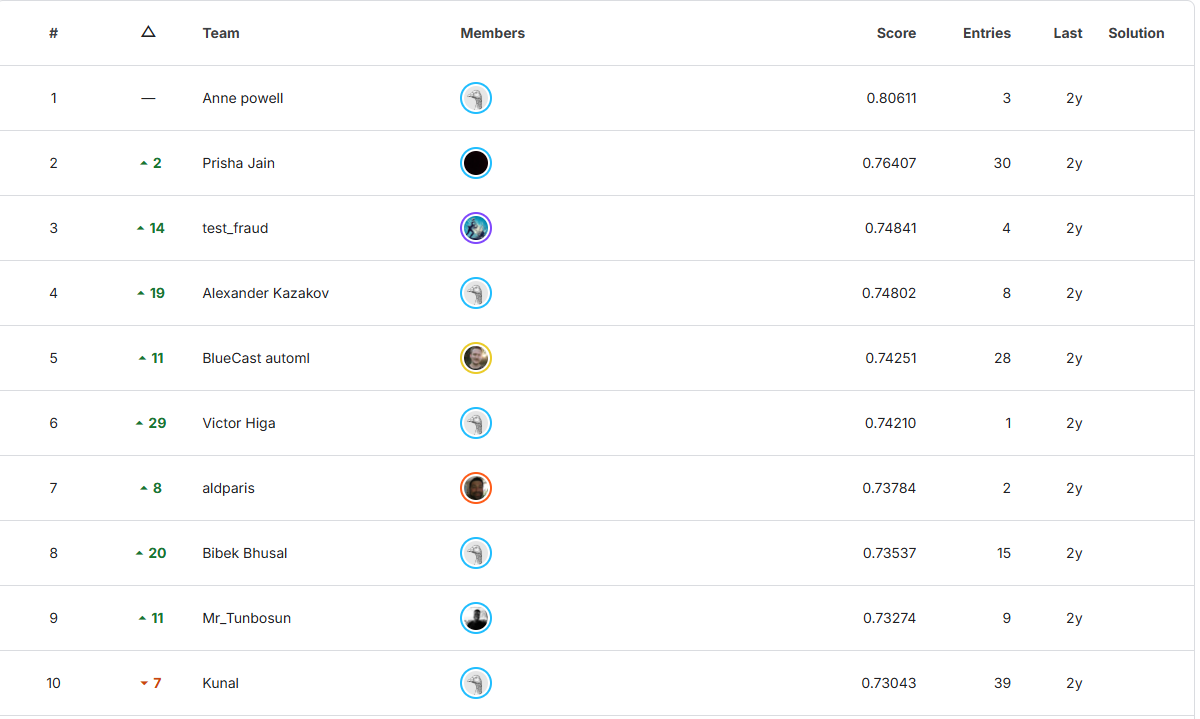